---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

The dataset covers the most recently updated health statistics of the world (countries recognized by WHO - World Health organization).The data is divided into 15 subcategories containing 36 datasets. Below are the categories on which the data was collected 
   1. Life expectancy and Healthy life expectancy
   2. Maternal mortality
   3. Newborn and child mortality
   4. Communicable Diseases
   5. Noncommunicable diseases and mental health
   6. Substance abuse
   7. Road Traffic Injuries
   8. Sexual and reproductive health
   9. Achieve universal health coverage (UHC) including financial risk protection
   10. Mortality from environment pollution
   11. Tobacco control
   12. Health Workforce
   13. Eliminate violence Against women and girls
   14. Drinking Water
   15. Clean household energy


To get started ,in this EDA, one of the subcategories - "Life expectancy and Healthy life expectancy"  and dataset associated with it  has been chosen  to visualise the data by generalising the plots into 2 main category -
1) World demographics on a timeline

2) World vs Region vs India trend


---
<a name = Section2></a>
# **2. Problem Statement**
---

Based on similarities/dissimilarities throughout the world, where does India stand  with respect to Life Expectency and Healthy Life Expectency when compared to all the countries of the world and South East Asia region. The WHO South-East Asia Region has 11 Member States - Bangladesh, Bhutan, Democratic People's Republic of Korea, India, Indonesia, Maldives, Myanmar, Nepal, Sri Lanka, Thailand, Timor-Leste.
<p><p align="left"><img src="https://s4.reutersmedia.net/resources/r/?m=02&d=20200416&t=2&i=1515348305&w=640&fh=&fw=&ll=&pl=&sq=&r=LYNXNPEG3F1JZ"></p>
<p align="Right"><img src="https://graphicriver.img.customer.envatousercontent.com/files/268528312/preview_11641417.jpg?auto=compress%2Cformat&q=80&fit=crop&crop=top&max-h=8000&max-w=590&s=44f847834ae5334f7e303c2bb9f8c7d6"></p></p></p>

Life expectancy gives an indication of how long a population is expected to live on average. But Healthy Life Expectancy (HALE) reveals the true health of a population.It’s about both length of life and quality of life. Not just the number of years the average person lives, but the number of years they can expect to live in good health.


---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [1]:
!pip install --upgrade --user pyqtwebengine==5.12.1
!pip install --upgrade --user pyqt5==5.12.3

In [2]:
!pip install markupsafe==2.0.1 --user

  Using cached MarkupSafe-2.0.1-cp39-cp39-win_amd64.whl (14 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Gayathri Gopalsami\\AppData\\Local\\Temp\\pip-uninstall-7z4y9c0k\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
!pip install h5py pip install typing-extensions pip install wheel

In [4]:
!pip install ruamel.yaml

In [5]:
!pip install -q datascience                                  
!pip install -q pandas-profiling  --user                           
!pip install Shapely

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.1.1 which is incompatible.


In [6]:
!pip install ipyleaflet

In [7]:
!pip install npm

In [8]:
!pip install -q --upgrade pandas-profiling                       
!pip install -q --upgrade ipyleaflet

### **Importing Libraries**



In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#---------------------------------------------------------------------------------------------------------------------------
import json
import requests
from ipyleaflet import Choropleth, Map 
from branca.colormap import linear , ColorMap ,step                 # For creating maps
#---------------------------------------------------------------------------------------------------------------------------


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

__a__. How was it collected? 

- __Name__: "World Health Statistics 2020"
- __Sponsoring Organization__: World Health Oraganization
- __Year__: 2020
- __Description__: "The World Health Organization manages and maintains a wide range of data collections related to global health and well-being as mandated by its Member States."

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

__c__. The datasets used for the analysis are 

Dataset-1 - lifeExpectancyAtBirth.csv

Dataset-2 - HALElifeExpectancyAtBirth.csv

Dataset-3 - HALeWHOregionLifeExpectancyAtBirth.csv



## **Data Information**

### **Importing Data Set 1 - lifeExpectancyAtBirth.csv**

In [3]:
df_le = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/gayathrig21/WorldHealthStats2020/main/lifeExpectancyAtBirth.csv')
print('Data Shape:', df_le.shape)
df_le.head()

Data Shape: (2197, 5)


Location  Period                         Indicator        Dim1  \
0  Afghanistan    2019  Life expectancy at birth (years)  Both sexes   
1  Afghanistan    2019  Life expectancy at birth (years)        Male   
2  Afghanistan    2019  Life expectancy at birth (years)      Female   
3  Afghanistan    2015  Life expectancy at birth (years)  Both sexes   
4  Afghanistan    2015  Life expectancy at birth (years)        Male   

   First Tooltip  
0          63.21  
1          63.29  
2          63.16  
3          61.65  
4          61.04

In [4]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2197 non-null   object 
 1   Period         2197 non-null   int64  
 2   Indicator      2197 non-null   object 
 3   Dim1           2197 non-null   object 
 4   First Tooltip  2197 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 85.9+ KB


In [5]:
df_le.describe()

Period  First Tooltip
count  2197.000000    2197.000000
mean   2010.958580      70.226331
std       7.366765       8.929307
min    1920.000000      27.970000
25%    2000.000000      64.250000
50%    2010.000000      71.830000
75%    2015.000000      77.120000
max    2019.000000      86.940000

In [6]:
df_le['First Tooltip'].median()

71.83

In [7]:
df_le.describe(include='all')

Location       Period                         Indicator        Dim1  \
count      2197  2197.000000                              2197        2197   
unique      184          NaN                                 1           3   
top      Canada          NaN  Life expectancy at birth (years)  Both sexes   
freq         13          NaN                              2197         733   
mean        NaN  2010.958580                               NaN         NaN   
std         NaN     7.366765                               NaN         NaN   
min         NaN  1920.000000                               NaN         NaN   
25%         NaN  2000.000000                               NaN         NaN   
50%         NaN  2010.000000                               NaN         NaN   
75%         NaN  2015.000000                               NaN         NaN   
max         NaN  2019.000000                               NaN         NaN   

        First Tooltip  
count     2197.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean        70.226331  
std          8.929307  
min         27.970000  
25%         64.250000  
50%         71.830000  
75%         77.120000  
max         86.940000

### **Data Set 1 -  Description**

This dataset provides the gender based life expectency in years for all the countries recognized by WHO over a period of time. 


|Id|Feature|Description|
|:--|:--|:--|
|01|Location|Country for which the data is collected | 
|02| Period | Year for which the data is collected|  
|03| Indicator | Indicates if the data corresponds to Life Expectency or Healthy Life Expectency| 
|04| Dim1|Gender Deographic Information |   
|05| 	First Tooltip| Life Expectency in years|



__a__. INFO function gives us the following insights into the df_le dataframe:

1) A total of 2197 samples (rows) in the dataframe

2) There 5 columns in the dataframe.

     3 columns with object datatype 
     
     1 column with an integer datatype.
     
     1 column with float datatype
     
3) There are 0 missing values in the data.

__b__. DESCRIBE function gives us the following insights into the df_le dataframe:

1)  Period column can be ignored for this as it is the year for which the data has been collected

2)  First Tooltip is the column which needs to be considered:

     It shows that life expectency in the data ranges from 27.97 to 86.94 years 
     
     Mean is 70.226331 years and median 71.83 which rules out many outliers or data discrepency
     
__c__. DESCRIBE function for all categorical colums gives us the following insights into the df_le dataframe:

1) There are 184 countries for which the data has been collected

2) Indicator coulmn has only 1 value  "Life expectancy at birth (years)" 

3) There are 3 gender categories.
   By eyeballing at the data frame , it seems like Genders are "Male" , "Female" and "Both sexes"  
   Both sexes category's  First Tooltip column value appears to be mean of "Male" , "Female" categories

### **Importing Data Set 2 -HALElifeExpectancyAtBirth.csv**

In [8]:
df_hale = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/gayathrig21/WorldHealthStats2020/main/HALElifeExpectancyAtBirth.csv')
print('Data Shape:', df_hale.shape)
df_hale.head()

Data Shape: (2196, 5)


Location  Period                                        Indicator  \
0  Afghanistan    2019  Healthy life expectancy (HALE) at birth (years)   
1  Afghanistan    2019  Healthy life expectancy (HALE) at birth (years)   
2  Afghanistan    2019  Healthy life expectancy (HALE) at birth (years)   
3  Afghanistan    2015  Healthy life expectancy (HALE) at birth (years)   
4  Afghanistan    2015  Healthy life expectancy (HALE) at birth (years)   

         Dim1  First Tooltip  
0  Both sexes          53.95  
1        Male          54.73  
2      Female          53.15  
3  Both sexes          52.60  
4        Male          52.78

In [9]:
df_hale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2196 non-null   object 
 1   Period         2196 non-null   int64  
 2   Indicator      2196 non-null   object 
 3   Dim1           2196 non-null   object 
 4   First Tooltip  2196 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 85.9+ KB


In [10]:
df_hale.describe()

Period  First Tooltip
count  2196.000000    2196.000000
mean   2011.000000      61.394854
std       7.107954       7.683352
min    2000.000000      25.370000
25%    2007.500000      56.240000
50%    2012.500000      63.110000
75%    2016.000000      67.130000
max    2019.000000      75.480000

In [11]:
df_hale['First Tooltip'].median()

63.11

In [12]:
df_hale.describe(include='all')

Location       Period  \
count          2196  2196.000000   
unique          184          NaN   
top     Afghanistan          NaN   
freq             12          NaN   
mean            NaN  2011.000000   
std             NaN     7.107954   
min             NaN  2000.000000   
25%             NaN  2007.500000   
50%             NaN  2012.500000   
75%             NaN  2016.000000   
max             NaN  2019.000000   

                                              Indicator        Dim1  \
count                                              2196        2196   
unique                                                1           3   
top     Healthy life expectancy (HALE) at birth (years)  Both sexes   
freq                                               2196         732   
mean                                                NaN         NaN   
std                                                 NaN         NaN   
min                                                 NaN         NaN   
25%                                                 NaN         NaN   
50%                                                 NaN         NaN   
75%                                                 NaN         NaN   
max                                                 NaN         NaN   

        First Tooltip  
count     2196.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean        61.394854  
std          7.683352  
min         25.370000  
25%         56.240000  
50%         63.110000  
75%         67.130000  
max         75.480000

### **Data Set 2 -  Description**

This dataset provides the gender based healthy life expectency in years for all the countries recognized by WHO over a period of time. 


|Id|Feature|Description|
|:--|:--|:--|
|01|Location|Country for which the data is collected | 
|02| Period | Year for which the data is collected|  
|03| Indicator | Indicates if the data corresponds to Life Expectency or Healthy Life Expectency| 
|04| Dim1|Gender Deographic Information |   
|05| 	First Tooltip| Healthy Life Expectency in years|



__a__. INFO function gives us the following insights into the df_hale dataframe:

1) A total of 2196 samples (rows) in the dataframe

2) There 5 columns in the dataframe.

     3 columns with object datatype 
     
     1 column with an integer datatype.
     
     1 column with float datatype
     
3) There are 0 missing values in the data.

__b__. DESCRIBE function gives us the following insights into the df_hale dataframe:

1)  Period column can be ignored for this as it is the year for which the data has been collected

2)  First Tooltip is the column which needs to be considered:

     It shows that healthy life expectency in the data ranges from 25.37 to 75.48 years  which is lower compared to life expectancy
     
     Mean is 61.39 years and median 63.11 which rules out many outliers or data discrepency
     
__c__. DESCRIBE function for all categorical colums gives us the following insights into the df_hale dataframe:

1) There are 184 countries for which the data has been collected

2) Indicator coulmn has only 1 value  "Healthy life expectancy (HALE) at birth (years)" 

3) There are 3 gender categories.
   By eyeballing at the data frame , it seems like Genders are "Male" , "Female" and "Both sexes"  
   Both sexes category's  First Tooltip column value appears to be mean of "Male" , "Female" categories

### **Importing Data Set 3 - HALeWHOregionLifeExpectancyAtBirth.csv**

In [13]:
df_le_hale_region = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/gayathrig21/WorldHealthStats2020/main/HALeWHOregionLifeExpectancyAtBirth.csv')
print('Data Shape:', df_le_hale_region.shape)
df_le_hale_region.head()

Data Shape: (72, 8)


Location  Period                                        Indicator  \
0   Africa    2019  Healthy life expectancy (HALE) at birth (years)   
1   Africa    2019  Healthy life expectancy (HALE) at birth (years)   
2   Africa    2019  Healthy life expectancy (HALE) at birth (years)   
3   Africa    2015  Healthy life expectancy (HALE) at birth (years)   
4   Africa    2015  Healthy life expectancy (HALE) at birth (years)   

         Dim1  Hale Expectency  Life expectany  Unnamed: 6  \
0  Both sexes            56.04           64.49   86.897193   
1        Male            55.00           62.37   88.183422   
2      Female            57.09           66.65   85.656414   
3  Both sexes            54.42           62.56   86.988491   
4        Male            53.38           60.47   88.275178   

   % OF HALE in life expectancy  
0                            87  
1                            88  
2                            86  
3                            87  
4                            88

In [14]:
df_le_hale_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location                      72 non-null     object 
 1   Period                        72 non-null     int64  
 2   Indicator                     72 non-null     object 
 3   Dim1                          72 non-null     object 
 4   Hale Expectency               72 non-null     float64
 5   Life expectany                72 non-null     float64
 6   Unnamed: 6                    72 non-null     float64
 7   % OF HALE in life expectancy  72 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.6+ KB


In [15]:
df_le_hale_region.describe()

Period  Hale Expectency  Life expectany  Unnamed: 6  \
count    72.000000        72.000000       72.000000   72.000000   
mean   2011.000000        61.403333       70.556806   87.038804   
std       7.156205         5.982161        6.880156    1.417579   
min    2000.000000        45.030000       51.060000   84.556613   
25%    2007.500000        57.870000       66.585000   86.022416   
50%    2012.500000        61.665000       71.375000   87.040977   
75%    2016.000000        66.360000       75.525000   88.185157   
max    2019.000000        70.240000       81.290000   90.128940   

       % OF HALE in life expectancy  
count                     72.000000  
mean                      87.013889  
std                        1.409156  
min                       85.000000  
25%                       86.000000  
50%                       87.000000  
75%                       88.000000  
max                       90.000000

In [16]:
df_le_hale_region['Hale Expectency'].median()

61.665

In [17]:
df_le_hale_region['Life expectany'].median()

71.375

In [18]:
df_le_hale_region['% OF HALE in life expectancy'].median()

87.0

In [19]:
df_le_hale_region.describe(include='all')

Location       Period                                        Indicator  \
count        72    72.000000                                               72   
unique        6          NaN                                                1   
top      Africa          NaN  Healthy life expectancy (HALE) at birth (years)   
freq         12          NaN                                               72   
mean        NaN  2011.000000                                              NaN   
std         NaN     7.156205                                              NaN   
min         NaN  2000.000000                                              NaN   
25%         NaN  2007.500000                                              NaN   
50%         NaN  2012.500000                                              NaN   
75%         NaN  2016.000000                                              NaN   
max         NaN  2019.000000                                              NaN   

              Dim1  Hale Expectency  Life expectany  Unnamed: 6  \
count           72        72.000000       72.000000   72.000000   
unique           3              NaN             NaN         NaN   
top     Both sexes              NaN             NaN         NaN   
freq            24              NaN             NaN         NaN   
mean           NaN        61.403333       70.556806   87.038804   
std            NaN         5.982161        6.880156    1.417579   
min            NaN        45.030000       51.060000   84.556613   
25%            NaN        57.870000       66.585000   86.022416   
50%            NaN        61.665000       71.375000   87.040977   
75%            NaN        66.360000       75.525000   88.185157   
max            NaN        70.240000       81.290000   90.128940   

        % OF HALE in life expectancy  
count                      72.000000  
unique                           NaN  
top                              NaN  
freq                             NaN  
mean                       87.013889  
std                         1.409156  
min                        85.000000  
25%                        86.000000  
50%                        87.000000  
75%                        88.000000  
max                        90.000000

### **Data Set 3-  Description**

This dataset provides the gender based life expectency and  healthy life expectency in years for all the countries recognized by WHO over a period of time. 


|Id|Feature|Description|
|:--|:--|:--|
|01|Location|Region for which the data is collected | 
|02| Period | Year for which the data is collected|  
|03| Indicator | Indicates if the data corresponds to Life Expectency or Healthy Life Expectency| 
|04| Dim1|Gender Deographic Information |   
|05| 	Hale Expectency| Healthy Life Expectency in years|
|06| 	Life Expectency| Life Expectency in years|
|07| Unamed| |  
|08| 	% OF HALE in life expectancy| Percentage of Healthy Life Expectency in Life Expectency|



__a__. INFO function gives us the following insights into the df_le_hale_region dataframe:

1) A total of 72 samples (rows) in the dataframe

2) There 8 columns in the dataframe.

     3 columns with object datatype 
     
     2 column with an integer datatype.
     
     3 column with float datatype
     
3) There are 0 missing values in the data.

__b__. DESCRIBE function gives us the following insights into the df_hale dataframe:

1)  Period column can be ignored for this as it is the year for which the data has been collected

2)  Hale Expectency is the column which needs to be considered:

     It shows that healthy life expectency in the data ranges from 45.03 to 70.24 years
     
     Mean is 61.39 years and median 63.11 which rules out many outliers or data discrepency     

3)  Life Expectency is the column which also needs to be considered:

     It shows that  life expectency in the data ranges from 51.06 to 81.29 years
     
     Mean is 70.556806 years and median 71.375 which rules out many outliers or data discrepency
   
4) There is also an unnamed column which appears to be rounded value for % OF HALE in life expectancy

5) % OF HALE in life expectancy appears to be a derived column 

   It shows that % OF HALE in life expectancy in the data ranges from 85 to 90
   
   Mean is 87.013889 years and median 87.0 which rules out many outliers or data discrepency.
   
__c__. DESCRIBE function for all categorical colums gives us the following insights into the df_hale dataframe:

1) There are 6 regions for which the data has been collected

2) Indicator coulmn has only 1 value  "Healthy life expectancy (HALE) at birth (years)" 

3) There are 3 gender categories.
   By eyeballing at the data frame , it seems like Genders are "Male" , "Female" and "Both sexes"  
   Both sexes category's  First Tooltip column value appears to be mean of "Male" , "Female" categories

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

## Profiling of Dataset 1  - df_le

In [20]:
profile_le_country = df_le.profile_report(title="Life Expectency Statistics by Country", progress_bar=False, minimal=True)
profile_le_country.to_file(output_file="life_expectency_by_country_before_preprocessing.html")

**Observations from Pandas Profiling of data set 1 before Data Processing** <br><br>

__Dataset info__:
- Number of variables: 	5
- Number of observations: 	2197
- Missing cells: None

__Variables types__: 
- Numeric = 1
- Categorical = 3
- Rejected = 1

__Column Analysis__:
- **Location** has **high cardinality**.with **187 distinct values** and **no missing data**.   


- **Period** has **5 distinct values**.and **no missing data**. 


- **Indicator** is **constant with value "Life expectancy at birth (years)"** and is **rejected**.


- **Dim1** has **3 distict values** with **Both sexes , Male and Female** .


- **First Tooltip** is numerical data with **no missing data**.


__Inferences__: 

- Every **Location** has **12 rows** except for **Canada** which has **13 rows**. 

- **Period** has **4 years (2000, 2010, 2015, 2019) with 549 rows** except for **1920 which has 1 row** which seems to be a **incorrect row**.  

- **Dim1** has **3 categories** of which **Both Sexes** has **733** rows whereas **Male and Female** categories have **722** rows.
  
__Conclusion__:  

- There is possibility of one corrupted/incorrect data in a row where period is **1920** which has data for **Both sexes** and Location is **Canada**.
- **Indicator** column can be dropped as it is constant and **First Tooltip** column can be renamed to "Life Expectency"  so that the data in the column makes sense.
- **Location** column can be renamed to "Country".

## Profiling of Dataset 2  - df_hale

In [21]:
profile_hale_country = df_hale.profile_report(title="Healthy Life Expectency by Country", progress_bar=False, minimal=True)
profile_hale_country.to_file(output_file="healthy_life_expectency_by_country_before_preprocessing.html")

**Observations from Pandas Profiling of data set 2 before Data Processing** <br><br>

__Dataset info__:
- Number of variables: 	5
- Number of observations: 	2196
- Missing cells: 0

__Variables types__: 
- Numeric = 1
- Categorical = 3
- Rejected = 1

__Column Analysis__:
- **Location** has **high cardinality**.with **187 distinct values** and **no missing data**.   


- **Period** has **4 distinct values**.and **no missing data**.  


- **Indicator** is **constant with value "Healthy Life expectancy at birth (years)"** and is **rejected**.


- **Dim1** has **3 distict values** with **Both sexes , Male and Female**.


- **First Tooltip** is numerical data with **no missing data**.


__Inferences__: 

- Every **Location** has **12 rows**.  

- **Period** has **4 years (2000, 2010, 2015, 2019) with 549 rows**. 

- **Dim1** has **3 categories** of which **Both Sexes , Male and Female** categories have **722** rows each.
  
__Conclusion__:  

- There doesnot seem to be any major issue with the data set and appears to have similar dataset as dataset 1
- **Indicator** column can be dropped as it is constant and **First Tooltip** column can be renamed to "Healthy Life Expectency"  so that the data in the column makes sense.
- **Location** column can be renamed to "Country".
- This dataset can be merged with data set 1 to get the Life Expectency and Healthy life expectency in single dataframe which will be helpful for doing the analysis.

## Profiling of Dataset 3  - df_le_hale_region

In [22]:
profile_le_hale_region = df_le_hale_region.profile_report(title="Healthy Life Expectency by Country", progress_bar=False, minimal=True)
profile_le_hale_region.to_file(output_file="hale_and_life_expectency_by_region_before_preprocessing.html")

**Observations from Pandas Profiling of data set 3 before Data Processing** <br><br>

__Dataset info__:
- Number of variables: 8
- Number of observations: 	72
- Missing cells: 0

__Variables types__: 
- Numeric = 4
- Categorical = 3
- Rejected = 1

__Column Analysis__:
- **Location** has **high cardinality**.with **6 distinct values** and **no missing data**.   


- **Period** has **4 distinct values**.and **no missing data**.  


- **Indicator** is **constant with value "Healthy Life expectancy at birth (years)"** and is **rejected**.


- **Dim1** has **3 distict values** with **Both sexes , Male and Female** .


- **Hale Expectency** is numerical data with  **no missing data**.

- **Life Expectency** is numerical data with  **no missing data**.

- **Unnamed** is numerical data with **no missing data**.

- **% OF HALE in life expectancy** is numerical data with **no missing data**.

__Inferences__: 

- Every **Location** has **12 rows** . 

- **Period** has **4 years (2000, 2010, 2015, 2019) with 18 rows** .

- **Dim1** has **3 categories** of which **Both Sexes , Male and Female** categories have **24** rows each.
  
__Conclusion__:  

- There doesnot seem to be any major issue with the data set and appears to have similar dataset as dataset 1 and 2
- This data set has both Life expectency and Healthy Life Expectency in the data frame
- **Unnamed** and **% OF HALE in life expectancy** columns can be dropped as these appears to be the calculated columns 
- **Indicator** column can be dropped as it is constant 
- **Location** column can be renamed to "Region".
  

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

## Data set 1 - (df_le) & Data set 2 - (df_hale) -  pre -processing


- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:

  - As concluded in the pre pofiliing merging dataframes df_le and df_hale.
  
  - Dropping "indicator" column from dataframes df_le and df_hale 

  - Renaming the columns to make more sense of data 

  - Dropping the row with period =1920 

 

In [23]:
df_le_hale_country=pd.merge(df_le,df_hale, how='left'
                                  ,left_on=['Location','Period' ,'Dim1']
                                 ,right_on=['Location','Period' ,'Dim1']).drop(['Indicator_x','Indicator_y'],1)

df_le_hale_country = df_le_hale_country.rename({'Location':'Country'
                                ,'Dim1':'Demograph' 
                                ,'First Tooltip_x':'Life_Expectency_In_Years'
                                ,'First Tooltip_y':'Healthy_Life_Expectency_In_Years'} , axis=1)

print('Data Shape:', df_le_hale_country.shape)
df_le_hale_country.head()

Data Shape: (2197, 5)


C:\Users\GAYATH~1\AppData\Local\Temp/ipykernel_22344/1806722789.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_le_hale_country=pd.merge(df_le,df_hale, how='left'


Country  Period   Demograph  Life_Expectency_In_Years  \
0  Afghanistan    2019  Both sexes                     63.21   
1  Afghanistan    2019        Male                     63.29   
2  Afghanistan    2019      Female                     63.16   
3  Afghanistan    2015  Both sexes                     61.65   
4  Afghanistan    2015        Male                     61.04   

   Healthy_Life_Expectency_In_Years  
0                             53.95  
1                             54.73  
2                             53.15  
3                             52.60  
4                             52.78

In [24]:
df_le_hale_country[df_le_hale_country['Period'] == 1920]

Country  Period   Demograph  Life_Expectency_In_Years  \
372  Canada    1920  Both sexes                     82.81   

     Healthy_Life_Expectency_In_Years  
372                               NaN

In [25]:
df_le_hale_country[df_le_hale_country['Country'] == 'Canada']

Country  Period   Demograph  Life_Expectency_In_Years  \
360  Canada    2019  Both sexes                     82.24   
361  Canada    2019        Male                     80.40   
362  Canada    2019      Female                     84.05   
363  Canada    2015  Both sexes                     81.76   
364  Canada    2015        Male                     79.88   
365  Canada    2015      Female                     83.58   
366  Canada    2010  Both sexes                     81.31   
367  Canada    2010        Male                     79.26   
368  Canada    2010      Female                     83.27   
369  Canada    2000  Both sexes                     79.10   
370  Canada    2000        Male                     76.54   
371  Canada    2000      Female                     81.55   
372  Canada    1920  Both sexes                     82.81   

     Healthy_Life_Expectency_In_Years  
360                             71.25  
361                             70.51  
362                             71.98  
363                             71.15  
364                             70.41  
365                             71.85  
366                             70.84  
367                             69.92  
368                             71.69  
369                             69.42  
370                             68.11  
371                             70.64  
372                               NaN

In [26]:
df_le_hale_country.drop(372, axis=0, inplace=True)

In [27]:
df_le_hale_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196 entries, 0 to 2196
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           2196 non-null   object 
 1   Period                            2196 non-null   int64  
 2   Demograph                         2196 non-null   object 
 3   Life_Expectency_In_Years          2196 non-null   float64
 4   Healthy_Life_Expectency_In_Years  2196 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 102.9+ KB


In [28]:
df_le_hale_country.describe(include='all')

Country       Period   Demograph  Life_Expectency_In_Years  \
count          2196  2196.000000        2196               2196.000000   
unique          184          NaN           3                       NaN   
top     Afghanistan          NaN  Both sexes                       NaN   
freq             12          NaN         732                       NaN   
mean            NaN  2011.000000         NaN                 70.220601   
std             NaN     7.107954         NaN                  8.927300   
min             NaN  2000.000000         NaN                 27.970000   
25%             NaN  2007.500000         NaN                 64.250000   
50%             NaN  2012.500000         NaN                 71.825000   
75%             NaN  2016.000000         NaN                 77.105000   
max             NaN  2019.000000         NaN                 86.940000   

        Healthy_Life_Expectency_In_Years  
count                        2196.000000  
unique                               NaN  
top                                  NaN  
freq                                 NaN  
mean                           61.394854  
std                             7.683352  
min                            25.370000  
25%                            56.240000  
50%                            63.110000  
75%                            67.130000  
max                            75.480000

## Data set 3 - (df_le_hale_region) pre -processing

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:

  - Dropping "indicator" , "unnamed" , "% OF HALE in life expectancy" columns from dataframes df_le_hale_regions 

  - Renaming the columns to make data sensible

In [29]:
df_le_hale_region.drop(['% OF HALE in life expectancy', 'Indicator', 'Unnamed: 6'] , axis=1 , inplace= True)
df_le_hale_region = df_le_hale_region.rename({'Location':'Region'
                                ,'Dim1':'Demograph' 
                                ,'Life expectany':'Life_Expectency_In_Years'
                                ,'Hale Expectency':'Healthy_Life_Expectency_In_Years'} , axis=1)

print('Data Shape:', df_le_hale_region.shape)
df_le_hale_region


Data Shape: (72, 5)


Region  Period   Demograph  Healthy_Life_Expectency_In_Years  \
0            Africa    2019  Both sexes                             56.04   
1            Africa    2019        Male                             55.00   
2            Africa    2019      Female                             57.09   
3            Africa    2015  Both sexes                             54.42   
4            Africa    2015        Male                             53.38   
..              ...     ...         ...                               ...   
67  Western Pacific    2010        Male                             65.36   
68  Western Pacific    2010      Female                             68.79   
69  Western Pacific    2000  Both sexes                             64.27   
70  Western Pacific    2000        Male                             62.91   
71  Western Pacific    2000      Female                             65.78   

    Life_Expectency_In_Years  
0                      64.49  
1                      62.37  
2                      66.65  
3                      62.56  
4                      60.47  
..                       ...  
67                     72.52  
68                     78.75  
69                     72.42  
70                     69.80  
71                     75.33  

[72 rows x 5 columns]

In [30]:
df_le_hale_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Region                            72 non-null     object 
 1   Period                            72 non-null     int64  
 2   Demograph                         72 non-null     object 
 3   Healthy_Life_Expectency_In_Years  72 non-null     float64
 4   Life_Expectency_In_Years          72 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.9+ KB


In [31]:
df_le_hale_region.describe(include = 'all')

Region       Period   Demograph  Healthy_Life_Expectency_In_Years  \
count       72    72.000000          72                         72.000000   
unique       6          NaN           3                               NaN   
top     Africa          NaN  Both sexes                               NaN   
freq        12          NaN          24                               NaN   
mean       NaN  2011.000000         NaN                         61.403333   
std        NaN     7.156205         NaN                          5.982161   
min        NaN  2000.000000         NaN                         45.030000   
25%        NaN  2007.500000         NaN                         57.870000   
50%        NaN  2012.500000         NaN                         61.665000   
75%        NaN  2016.000000         NaN                         66.360000   
max        NaN  2019.000000         NaN                         70.240000   

        Life_Expectency_In_Years  
count                  72.000000  
unique                       NaN  
top                          NaN  
freq                         NaN  
mean                   70.556806  
std                     6.880156  
min                    51.060000  
25%                    66.585000  
50%                    71.375000  
75%                    75.525000  
max                    81.290000

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

## Data set 1 - (df_le_hale_country) post -profiling

In [32]:
profile_le_hale_country = df_le_hale_country.profile_report(title="Life Expectency and HALE Statistics by Country", progress_bar=False, minimal=True)
profile_le_hale_country.to_file(output_file="life_expectency_by_country_after_preprocessing.html")

**Observations from Pandas Profiling of data set 1 after Data Processing** <br><br>

__Dataset info__:
- Number of variables: 6
- Number of observations: 	2196
- Missing cells: 0

__Variables types__: 
- Numeric = 3
- Categorical = 3

__Column Analysis__:
- **Country** has **high cardinality**.with **184 distinct values** and **no missing data** 

- **Period** has **4 distinct values**.and **no missing data**  

- **Demograph** has **3 distict values** with **Both sexes , Male and Female** 

- **Hale Expectency** is numerical data with  **no missing data**

- **Life Expectency** is numerical data with  **no missing data**

__Inferences__: 

- Every **Location** has **12 rows**.  

- **Period** has **4 years (2000, 2010, 2015, 2019) with 549 rows**. 

- **Demograph** has **3 categories** of which **Both Sexes , Male and Female** categories have **732** rows each.
  
__Conclusion__:  

- The data now is pre- processed and ready for EDA

## Data set 2 - (df_le_hale_region) post -profiling

In [33]:
profile_le_hale_region = df_le_hale_region.profile_report(title="Life Expectency and HALE Statistics by Region", progress_bar=False, minimal=True)
profile_le_hale_region.to_file(output_file="life_expectency_by_region_after_preprocessing.html")

**Observations from Pandas Profiling of data set 2 after Data Processing** <br><br>

__Dataset info__:
- Number of variables: 5
- Number of observations: 	72
- Missing cells: 0

__Variables types__: 
- Numeric = 3
- Categorical = 2

__Column Analysis__:
- **Region** has **high cardinality**.with **6 distinct values** and **no missing data** 

- **Period** has **4 distinct values**.and **no missing data**  

- **Demograph** has **3 distict values** with **Both sexes , Male and Female** 

- **Hale Expectency** is numerical data with  **no missing data**

- **Life Expectency** is numerical data with  **no missing data**

__Inferences__: 

- Every **Location** has **12 rows**  

- **Period** has **4 years (2000, 2010, 2015, 2019) with 18 rows** 

- **Demograph** has **3 categories** of which **Both Sexes , Male and Female** categories have **24** rows
  
__Conclusion__:  

- The data now is pre- processed and ready for EDA

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

**Datasets** : We have 2 datasets

1) df_le_hale_country - has country wise information

2) df_le_hale_region - has region wise information


**Objective** - To visualise the data by generalising the plots into 2 main category with respect to HALE and Life Expectency-

1) World demographics on a timeline 

2) World vs Region vs India trend


### Question 1:
- How does __Healthy Life Expectency__ relate to __Life Expectency__ ?

<Figure size 1152x432 with 0 Axes>

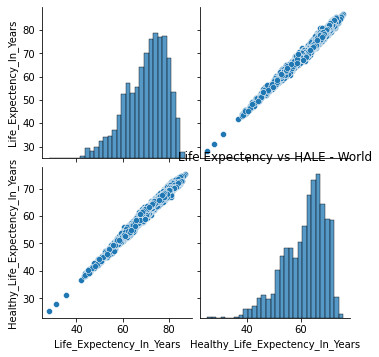

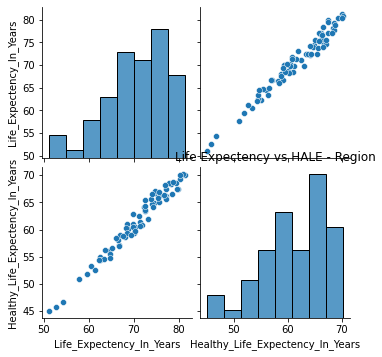

In [34]:
plt.figure(figsize=(16, 6))

df_le_hale_relation_country = df_le_hale_country[['Life_Expectency_In_Years','Healthy_Life_Expectency_In_Years'] ]
sns.pairplot(df_le_hale_relation_country)
plt.title('Life Expectency vs HALE - World')

df_le_hale_relation_region = df_le_hale_region[['Life_Expectency_In_Years','Healthy_Life_Expectency_In_Years'] ]
sns.pairplot(df_le_hale_relation_region)
plt.title('Life Expectency vs HALE - Region');

**Observation** - The Healthy Life Expectency (HALE) and Life Expectency are highly correlated . This means that if the Life Expectency of a region or country is high then it has better Healthy Life Expectency.  

### Question 2:
- How is __Life Expectency__ trend of different regions over a period from 2000 to 2019?  
- As India is part of SE Asia region, how is SE Asia doing in terms of __Life Expectency__ compared to other regions?

In [35]:
df_le_hale_region['Region'].unique()

array(['Africa', 'Americas', 'South-East Asia', 'Europe',
       'Eastern Mediterranean', 'Western Pacific'], dtype=object)

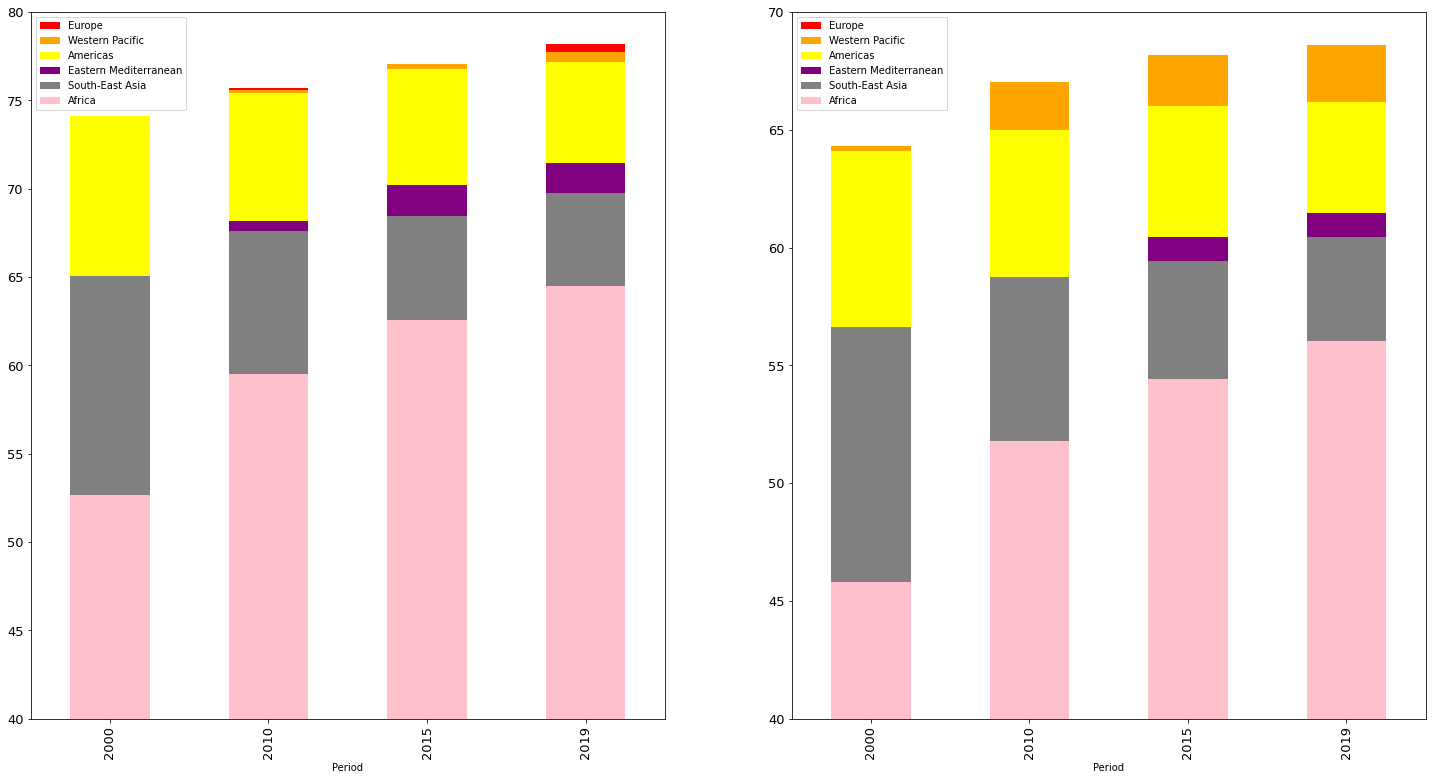

In [36]:
plt.figure(figsize=(25,13))

plt1 = plt.subplot2grid((1,2),(0,0), rowspan=1, colspan=1)
df_le_hale_region[df_le_hale_region['Region'] == 'Europe'].groupby(['Period'])['Life_Expectency_In_Years'].mean().plot(kind='bar', color='red', fontsize=13)
df_le_hale_region[df_le_hale_region['Region'] == 'Western Pacific'].groupby(['Period'])['Life_Expectency_In_Years'].mean().plot(kind='bar', color='orange', fontsize=13 )
df_le_hale_region[df_le_hale_region['Region'] == 'Americas'].groupby(['Period'])['Life_Expectency_In_Years'].mean().plot(kind='bar', color='yellow', fontsize=13 )
df_le_hale_region[df_le_hale_region['Region'] == 'South-East Asia'].groupby(['Period'])['Life_Expectency_In_Years'].mean().plot(kind='bar', color='purple', fontsize=13 )
df_le_hale_region[df_le_hale_region['Region'] == 'Eastern Mediterranean'].groupby(['Period'])['Life_Expectency_In_Years'].mean().plot(kind='bar', color='grey', fontsize=13)
df_le_hale_region[df_le_hale_region['Region'] == 'Africa'].groupby(['Period'])['Life_Expectency_In_Years'].mean().plot(kind='bar', color='pink',fontsize=13)
plt.ylim(40,80)
plt.legend(['Europe', 'Western Pacific' ,'Americas' , 'Eastern Mediterranean', 'South-East Asia','Africa'])


plt1 = plt.subplot2grid((1,2),(0,1), rowspan=1, colspan=1)
df_le_hale_region[df_le_hale_region['Region'] == 'Europe'].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean().plot(kind='bar', color='red', fontsize=13)
df_le_hale_region[df_le_hale_region['Region'] == 'Western Pacific'].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean().plot(kind='bar', color='orange', fontsize=13 )
df_le_hale_region[df_le_hale_region['Region'] == 'Americas'].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean().plot(kind='bar', color='yellow', fontsize=13 )
df_le_hale_region[df_le_hale_region['Region'] == 'South-East Asia'].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean().plot(kind='bar', color='purple', fontsize=13 )
df_le_hale_region[df_le_hale_region['Region'] == 'Eastern Mediterranean'].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean().plot(kind='bar', color='grey', fontsize=13)
df_le_hale_region[df_le_hale_region['Region'] == 'Africa'].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean().plot(kind='bar', color='pink',fontsize=13)
plt.ylim(40,70)
plt.legend(['Europe', 'Western Pacific' ,'Americas' , 'Eastern Mediterranean', 'South-East Asia','Africa'])

**Observation** - 

1) For all the regions , overall the __Life Expectency__ and __Healthy Life Expectency__ has __improved__ over a period of time.

2) __Africa__ has remained the lowest in both "Life Expectency and Healthy Life Expectency"  through 2000 to 2019.

3) __Erope__ has highest __Life Expectency__ in 2019

4) __Africa__ is also making good progress by increasing its __Life Expectency__  from 53 years in 2000 to 63 in 2019.

5) __SE Asia__ region is making  very slow progress comparively in improving its __Life Expectency__ . It has only increased its __Life Expectency__ from 65 to 68 years over a period on 10 years. 

6) Whereas  __Eastern Mediterranean__ had made somewhat good progess in improving its __Life Expectency__ from 65 to 70 years.

7) Similar trend is seen for __Healthy Life Expectency__ for regions like __Africa__, __SE Asia__ and __Eastern Mediterranean__

8) __Europe__ and __Western Pacific__ are almost maintaining the same trend from 2000 to 2010




### Question 3:
- How is __India__ placed in  __Life Expectency__ and __Healthy Life Expectency__ compared to its SE Region and World?

In [37]:
# Filter the data for India
filter_india = (df_le_hale_country['Country'] =='India')
df_le_hale_India = df_le_hale_country.loc[filter_india]
df_le_hale_India

Country  Period   Demograph  Life_Expectency_In_Years  \
901   India    2019  Both sexes                     70.79   
902   India    2019        Male                     69.52   
903   India    2019      Female                     72.17   
904   India    2015  Both sexes                     69.31   
905   India    2015        Male                     68.11   
906   India    2015      Female                     70.62   
907   India    2010  Both sexes                     67.23   
908   India    2010        Male                     65.69   
909   India    2010      Female                     68.94   
910   India    2000  Both sexes                     62.11   
911   India    2000        Male                     61.34   
912   India    2000      Female                     62.92   

     Healthy_Life_Expectency_In_Years  
901                             60.33  
902                             60.28  
903                             60.39  
904                             59.14  
905                             59.12  
906                             59.16  
907                             57.32  
908                             57.03  
909                             57.65  
910                             52.95  
911                             53.19  
912                             52.68

In [38]:
# Only the data for SE Asia
filter_SE_Asia = (df_le_hale_region['Region'] =='South-East Asia')
df_le_hale_SE_Asia = df_le_hale_region.loc[filter_SE_Asia]
df_le_hale_SE_Asia

Region  Period   Demograph  Healthy_Life_Expectency_In_Years  \
24  South-East Asia    2019  Both sexes                             61.46   
25  South-East Asia    2019        Male                             61.07   
26  South-East Asia    2019      Female                             61.87   
27  South-East Asia    2015  Both sexes                             60.46   
28  South-East Asia    2015        Male                             60.10   
29  South-East Asia    2015      Female                             60.84   
30  South-East Asia    2010  Both sexes                             58.68   
31  South-East Asia    2010        Male                             58.13   
32  South-East Asia    2010      Female                             59.28   
33  South-East Asia    2000  Both sexes                             54.54   
34  South-East Asia    2000        Male                             54.36   
35  South-East Asia    2000      Female                             54.73   

    Life_Expectency_In_Years  
24                     71.44  
25                     69.88  
26                     73.10  
27                     70.20  
28                     68.70  
29                     71.78  
30                     68.11  
31                     66.39  
32                     69.99  
33                     63.35  
34                     62.20  
35                     64.58

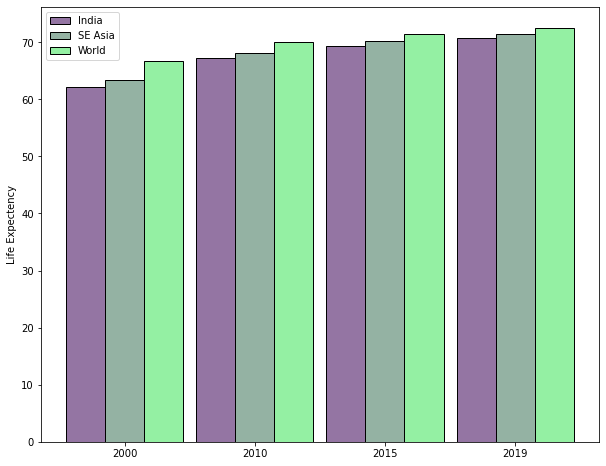

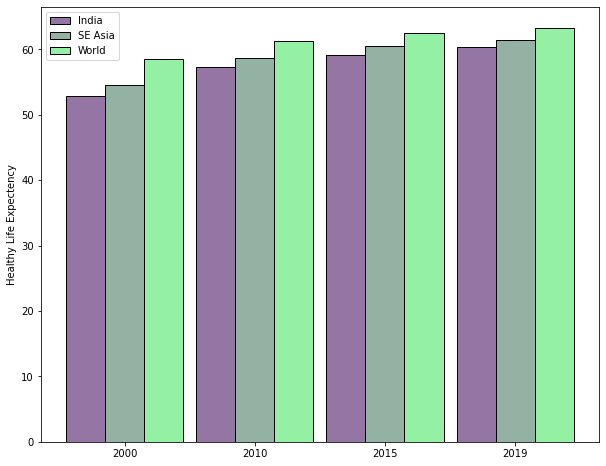

In [39]:

# bars
df_le_bar_India= df_le_hale_India.groupby(['Period'])['Life_Expectency_In_Years'].mean()
df_le_bar_SE_Asia = df_le_hale_SE_Asia.groupby(['Period'])['Life_Expectency_In_Years'].mean()
df_le_bar_World = df_le_hale_country.groupby(['Period'])['Life_Expectency_In_Years'].mean()

df_hale_bar_India= df_le_hale_India.groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean()
df_hale_bar_SE_Asia = df_le_hale_SE_Asia.groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean()
df_hale_bar_World = df_le_hale_country.groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean()
# x axis
years = df_le_hale_country['Period'].sort_values(ascending=True).unique().tolist()

# The x position of bars
barWidth = 0.3
r1 = np.arange(len(years))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


# plotting life expectency bars
plt.figure(figsize=(10,8))
plt.bar(r1, df_le_bar_India, width = barWidth, color = (0.3,0.1,0.4,0.6), edgecolor = 'black', capsize=7, label='India') 
plt.bar(r2, df_le_bar_SE_Asia, width = barWidth, color = (0.3,0.5,0.4,0.6), edgecolor = 'black', capsize=7, label='SE Asia') 
plt.bar(r3, df_le_bar_World, width = barWidth, color = (0.3,0.9,0.4,0.6), edgecolor = 'black', capsize=7, label='World') 
# general layout
plt.xticks(r2, labels=years)
plt.ylabel('Life Expectency')
plt.legend() 
# Show graphic
plt.show()

plt.figure(figsize=(10,8))
# plotting healthy life expectency bars
plt.bar(r1, df_hale_bar_India, width = barWidth, color = (0.3,0.1,0.4,0.6), edgecolor = 'black', capsize=7, label='India')
plt.bar(r2, df_hale_bar_SE_Asia, width = barWidth, color = (0.3,0.5,0.4,0.6), edgecolor = 'black', capsize=7, label='SE Asia')
plt.bar(r3, df_hale_bar_World, width = barWidth, color = (0.3,0.9,0.4,0.6), edgecolor = 'black', capsize=7, label='World') 
 # general layout
plt.xticks(r2, labels=years )
plt.ylabel('Healthy Life Expectency')
plt.legend()
 # Show graphic
plt.show()



**Observation** - 

1) India's __Life Expectency__ and __Healthy Life Expectency__ has __improved__ over a period of time.

2) Average __life expectency and HALE__ of __India__ has remained low compared to the __World's Life Expectency and SE Asia__

3) Growth India's __Life Expectency__ and __Healthy Life Expectency__ has remained consistent with __World and SE Asia__


### Question 4:
- Where is __India__ placed in  __Life Expectency__ and __Healthy Life Expectency__ compared to countries in __SE Asia Region and World__ in 2019?

In [40]:
def rank_le_by_year(year):
    filter_country_by_year= (df_le_hale_country['Period']  == year ) &  (df_le_hale_country['Demograph']  == 'Both sexes' )
    df_le_country_by_year = df_le_hale_country.loc[filter_country_by_year][['Country','Life_Expectency_In_Years', 'Healthy_Life_Expectency_In_Years']]
    df_le_country_by_year['Life_Expectency_Rank'] = df_le_country_by_year['Life_Expectency_In_Years'].rank(ascending=False)
    df_le_country_by_year =df_le_country_by_year.set_index('Life_Expectency_Rank').sort_index()
    return df_le_country_by_year

def rank_hale_by_year(year):
    filter_country_by_year= (df_le_hale_country['Period']  == year ) &  (df_le_hale_country['Demograph']  == 'Both sexes' )
    df_hale_country_by_year = df_le_hale_country.loc[filter_country_by_year][['Healthy_Life_Expectency_In_Years','Country']]
    df_hale_country_by_year['Healthy_Life_Expectency_Rank'] = df_hale_country_by_year['Healthy_Life_Expectency_In_Years'].rank(ascending=False)
    df_hale_country_by_year =df_hale_country_by_year.set_index('Healthy_Life_Expectency_Rank').sort_index()
    return df_hale_country_by_year



df_le_country_2019 = rank_le_by_year(2019) 
df_le_country_2015 = rank_le_by_year(2015) 
df_le_country_2010 = rank_le_by_year(2010) 
df_le_country_2000 = rank_le_by_year(2000) 


df_hale_country_2019 = rank_hale_by_year(2019) 
df_hale_country_2015 = rank_hale_by_year(2015) 
df_hale_country_2010 = rank_hale_by_year(2010) 
df_hale_country_2000 = rank_hale_by_year(2000) 

df_le_country_2000_top20 = df_le_country_2000[:20]
df_le_country_2010_top20 = df_le_country_2010[:20]
df_le_country_2015_top20 = df_le_country_2015[:20]
df_le_country_2019_top20 = df_le_country_2019[:20]


df_le_country_2000_bottom20=df_le_country_2000.sort_index(ascending=False).head(20)
df_le_country_2010_bottom20=df_le_country_2010.sort_index(ascending=False).head(20)
df_le_country_2015_bottom20=df_le_country_2015.sort_index(ascending=False).head(20)
df_le_country_2019_bottom20=df_le_country_2019.sort_index(ascending=False).head(20)

df_le_country_rank_India_2019 = df_le_country_2019.loc[df_le_country_2019['Country'] == 'India'].assign(Period = [2019])
df_le_country_rank_India_2015 = df_le_country_2015.loc[df_le_country_2015['Country'] == 'India'].assign(Period = [2015])
df_le_country_rank_India_2010 = df_le_country_2010.loc[df_le_country_2010['Country'] == 'India'].assign(Period = [2010])
df_le_country_rank_India_2000 = df_le_country_2000.loc[df_le_country_2000['Country'] == 'India'].assign(Period = [2000])


df_hale_country_rank_India_2019 = df_hale_country_2019.loc[df_hale_country_2019['Country'] == 'India'].assign(Period = [2019])
df_hale_country_rank_India_2015 = df_hale_country_2015.loc[df_hale_country_2015['Country'] == 'India'].assign(Period = [2015])
df_hale_country_rank_India_2010 = df_hale_country_2010.loc[df_hale_country_2010['Country'] == 'India'].assign(Period = [2010])
df_hale_country_rank_India_2000 = df_hale_country_2000.loc[df_hale_country_2000['Country'] == 'India'].assign(Period = [2000])

In [41]:
df_le_country_rank_India_2019.assign(Period = [2019])

Country  Life_Expectency_In_Years  \
Life_Expectency_Rank                                     
117.0                  India                     70.79   

                      Healthy_Life_Expectency_In_Years  Period  
Life_Expectency_Rank                                            
117.0                                            60.33    2019

In [42]:
df_hale_country_rank_India_2019.assign(Period = [2019])

Healthy_Life_Expectency_In_Years Country  Period
Healthy_Life_Expectency_Rank                                                  
126.0                                                    60.33   India    2019

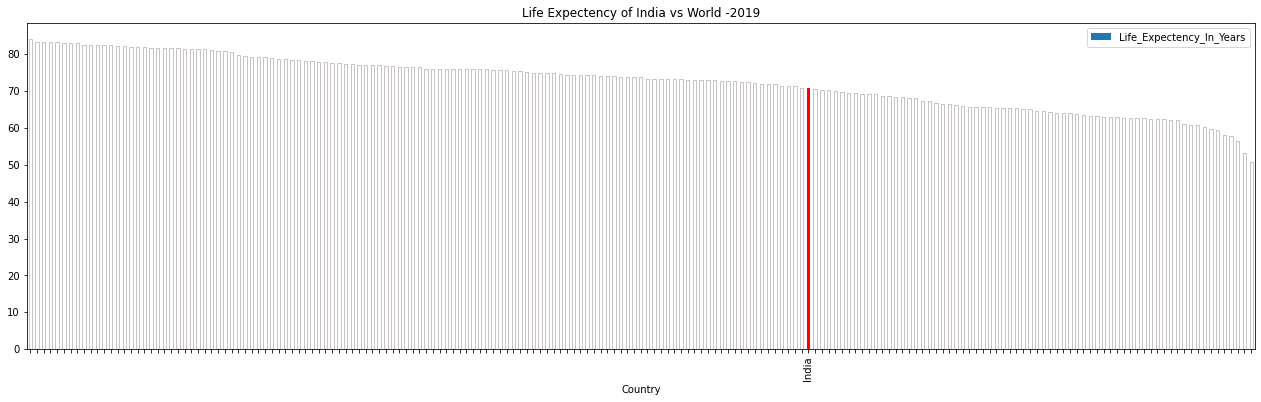

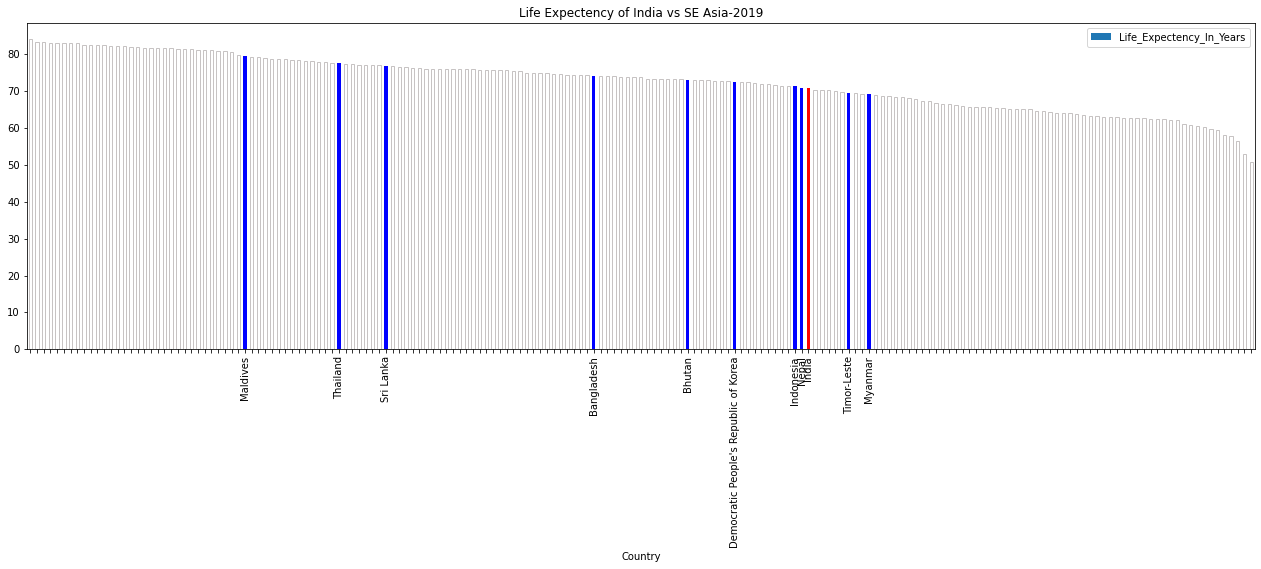

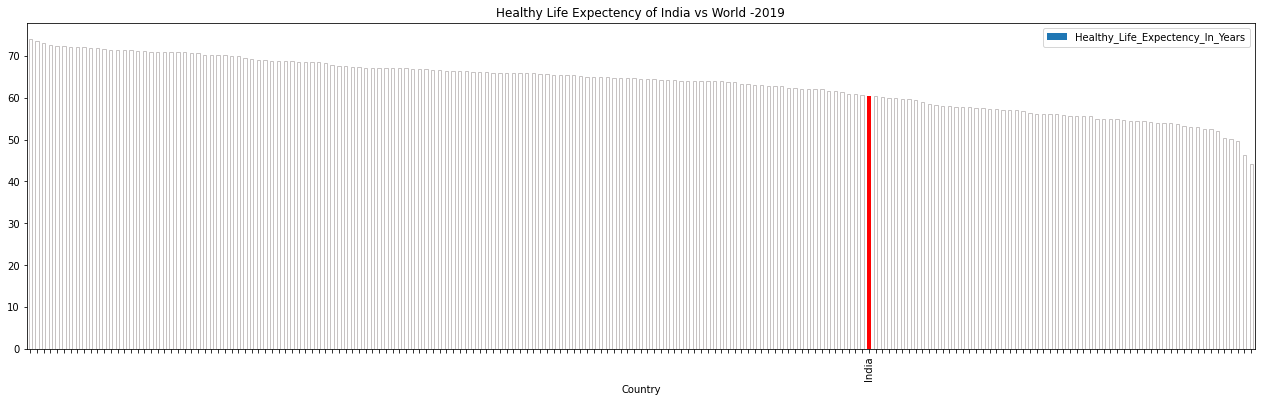

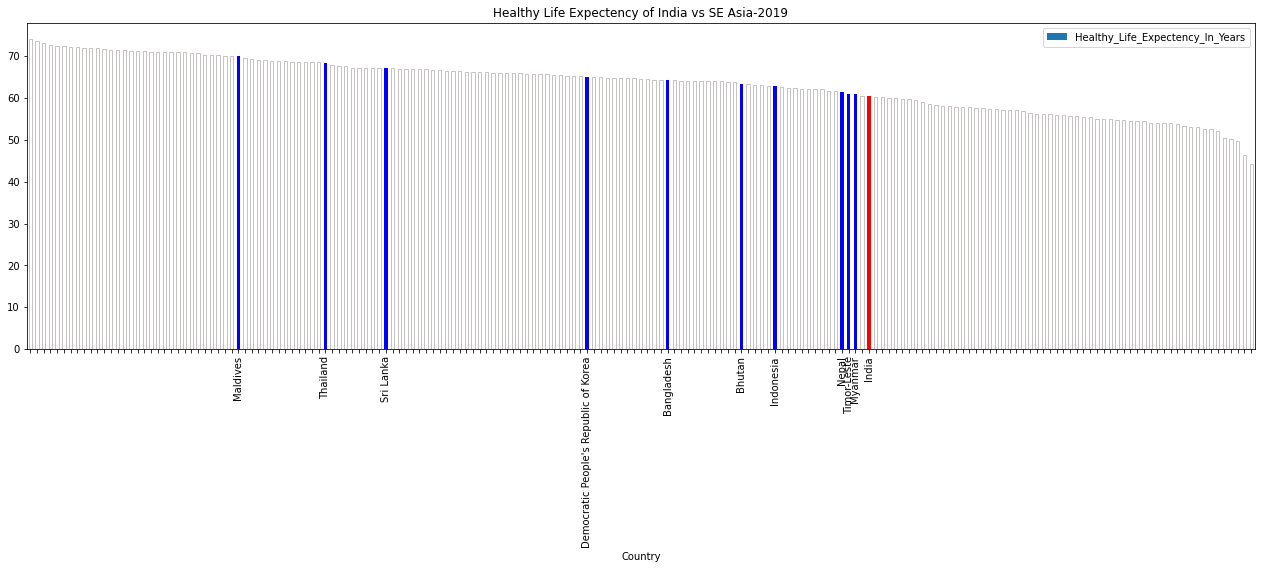

In [43]:
#Life Expectency - 2019
df_le_country_2019 =df_le_country_2019.set_index('Country')


a = df_le_country_2019[['Life_Expectency_In_Years']].plot(kind='bar', title ="Life Expectency of India vs World -2019", figsize=(22, 6), fontsize=10)
for ticks in a.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in 'India':        
        ticks.label1.set_visible(False)
        a.patches[df_le_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        a.patches[df_le_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        a.patches[df_le_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')  
        
a = df_le_country_2019[['Life_Expectency_In_Years']].plot(kind='bar', title ="Life Expectency of India vs SE Asia-2019", figsize=(22, 6), fontsize=10)

SE_Asia_Countries = ["Bangladesh", "Bhutan", "Democratic People's Republic of Korea", "India", 
                     "Indonesia", "Maldives", "Myanmar", "Nepal", "Sri Lanka", "Thailand", "Timor-Leste"]
for ticks in a.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in SE_Asia_Countries:        
        ticks.label1.set_visible(False)
        a.patches[df_le_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        a.patches[df_le_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        if ticks.label1.get_text() not in "India":    
            a.patches[df_le_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('b') 
        else:
            a.patches[df_le_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r') 
            
df_le_country_2019.reset_index(level=0, inplace=True)


#Healthy Life Expectency - 2019
df_hale_country_2019 =df_hale_country_2019.set_index('Country')
a = df_hale_country_2019[['Healthy_Life_Expectency_In_Years']].plot(kind='bar', title ="Healthy Life Expectency of India vs World -2019", figsize=(22, 6), fontsize=10)
for ticks in a.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in 'India':        
        ticks.label1.set_visible(False)
        a.patches[df_hale_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        a.patches[df_hale_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        a.patches[df_hale_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')  
        
a = df_hale_country_2019[['Healthy_Life_Expectency_In_Years']].plot(kind='bar', title ="Healthy Life Expectency of India vs SE Asia-2019", figsize=(22, 6), fontsize=10)

SE_Asia_Countries = ["Bangladesh", "Bhutan", "Democratic People's Republic of Korea", "India", 
                     "Indonesia", "Maldives", "Myanmar", "Nepal", "Sri Lanka", "Thailand", "Timor-Leste"]
for ticks in a.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in SE_Asia_Countries:        
        ticks.label1.set_visible(False)
        a.patches[df_hale_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        a.patches[df_hale_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        if ticks.label1.get_text() not in "India":    
            a.patches[df_hale_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('b') 
        else:
            a.patches[df_hale_country_2019.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r') 
            
df_hale_country_2019.reset_index(level=0, inplace=True)

**Observation** - 

1)  __India__ ranks __117__ compared to 184 countries of the world in 2019 with Life Expectency of __70 years__.

2) __India__ ranks __9th__  in __Life Expectency__  when compared with the 11 countries in SE Asian region , just above __Timor-Leste__ and __Mayanmar__

3)  __India__ ranks __126__ compared to 184 countries of the world in 2019 with Healthy Life Expectency of __60 years__.

4) __India__ ranks __11th (last)__ in __Healthy Life Expectency__ when compared with the 11 countries in SE Asian region 

### Question 5:
- How is __India__ ranked among the countries of World in __Life Expectency__ through 2000 to 2019?

In [44]:
df = [df_le_country_rank_India_2019
                                ,df_le_country_rank_India_2015
                                ,df_le_country_rank_India_2010
                                ,df_le_country_rank_India_2000]


df_le_country_rank_India = pd.concat(df).sort_values(by='Period' , ascending='True')
df_le_country_rank_India.reset_index(level=0, inplace=True)

df = [df_hale_country_rank_India_2019
                                ,df_hale_country_rank_India_2015
                                ,df_hale_country_rank_India_2010
                                ,df_hale_country_rank_India_2000]


df_hale_country_rank_India = pd.concat(df).sort_values(by='Period' , ascending='True')
df_hale_country_rank_India.reset_index(level=0, inplace=True)
df_hale_country_rank_India

Healthy_Life_Expectency_Rank  Healthy_Life_Expectency_In_Years Country  \
0                         134.5                             52.95   India   
1                         131.0                             57.32   India   
2                         127.0                             59.14   India   
3                         126.0                             60.33   India   

   Period  
0    2000  
1    2010  
2    2015  
3    2019

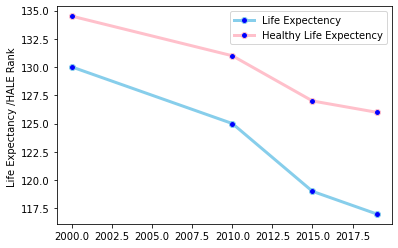

In [45]:
plt.plot( 'Period', 'Life_Expectency_Rank', data=df_le_country_rank_India, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Life Expectency")
plt.plot( 'Period', 'Healthy_Life_Expectency_Rank', data=df_hale_country_rank_India, marker='o', markerfacecolor='blue', color='pink', linewidth=3, label="Healthy Life Expectency")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Life Expectancy /HALE Rank ")
plt.legend()

**Observation** - 

1)  __India's__ rank with respect to __Life Expectency__ has improved from __130__ in year __2000__ to  __117__ year __2019__.

2) __India's__ rank with respect to __Healthy Expectency__ has improved from __134__ in year __2000__ to  __126__ year __2019__, but the trend is not in line with  __Life Expectency__ from 2015 to 2019.

### Question 6:
- Which are the top 20 countries in terms of Life Expectency and How the ranking have improved/diminished over a period on 10  years

In [46]:
fig = plt.figure(figsize=(250,150))

plt1 = plt.subplot2grid((1,4),(0,0), rowspan=1, colspan=1)
b =sns.barplot(y='Country',x=df_le_country_2000_top20['Life_Expectency_In_Years'],data=df_le_country_2000_top20)
b.axes.set_title("Top 20 Countries in Life Expectency- 2000 ",fontsize=100)
b.tick_params(labelsize=100, rotation=0)

plt2 = plt.subplot2grid((1,4),(0,1), rowspan=1, colspan=1)
b =sns.barplot(y='Country',x=df_le_country_2010_top20['Life_Expectency_In_Years'],data=df_le_country_2010_top20)
b.axes.set_title("Top 20 Countries in Life Expectency- 2010 ",fontsize=100)
b.tick_params(labelsize=100, rotation=0)

plt3 = plt.subplot2grid((1,4),(0,2), rowspan=1, colspan=1)
b =sns.barplot(y='Country',x=df_le_country_2015_top20['Life_Expectency_In_Years'],data=df_le_country_2015_top20)
b.axes.set_title("Top 20 Countries in Life Expectency- 2015 ",fontsize=100)
b.tick_params(labelsize=100, rotation=0)

plt4 = plt.subplot2grid((1,4),(0,3), rowspan=1, colspan=1)
b =sns.barplot(y='Country',x=df_le_country_2019_top20['Life_Expectency_In_Years'],data=df_le_country_2019_top20)
b.axes.set_title("Top 20 Countries in Life Expectency- 2019 ",fontsize=100)
b.tick_params(labelsize=100, rotation=0)

**Observation** 

1) All the top 20 countries have the __Life Expectency__ over __80 Years__ 

2)  __Japan__ has consitently been on top for 10 years from 2000 to 2019 

3) __Repulic of Korea__ has shown a tremendous improvement over the years from below 20th position in 2000 to 3rd position in 2019

4) __Germany__ has made its way back to top 20 in 2019 after 2000. 

5) __Luxembourg__ had not been very consistent as it  made it to 5th position in 2015 from  15th in 2000 . In 2019, it slipped to 11th position


### Question 6:
- Which are the bottom 20 countries in terms of Life Expectency and How the ranking have improved/diminished over a period on 10  years

In [47]:
fig = plt.figure(figsize=(350,200))

plt1 = plt.subplot2grid((1,4),(0,0), rowspan=1, colspan=1)
b =sns.barplot(y='Country',x=df_le_country_2000_bottom20['Life_Expectency_In_Years'],data=df_le_country_2000_bottom20)
b.axes.set_title("Bottom 20 Countries in Life Expectency- 2000 ",fontsize=150)
b.tick_params(labelsize=150, rotation=0)

plt2 = plt.subplot2grid((1,4),(0,1), rowspan=1, colspan=1)
b =sns.barplot(y='Country',x=df_le_country_2010_bottom20['Life_Expectency_In_Years'],data=df_le_country_2010_bottom20)
b.axes.set_title("Bottom 20 Countries in Life Expectency- 2010 ",fontsize=150)
b.tick_params(labelsize=150, rotation=0)

plt3 = plt.subplot2grid((1,4),(0,2), rowspan=1, colspan=1)
b =sns.barplot(y='Country',x=df_le_country_2015_bottom20['Life_Expectency_In_Years'],data=df_le_country_2015_bottom20)
b.axes.set_title("Bottom 20 Countries in Life Expectency- 2015 ",fontsize=150)
b.tick_params(labelsize=150, rotation=0)

plt4 = plt.subplot2grid((1,4),(0,3), rowspan=1, colspan=1)
b =sns.barplot(y='Country',x=df_le_country_2019_bottom20['Life_Expectency_In_Years'],data=df_le_country_2019_bottom20)
b.axes.set_title("Bottom 20 Countries in Life Expectency- 2019 ",fontsize=150)
b.tick_params(labelsize=150, rotation=0)

**Observation** 

1) The __Life Expectency__ of bottom countires have also improved from an average of __50 Years__ to __60 Years__ from 2000 to 2010

2) There is no consistent behavior observed here

### Question 7:
- How is the __Healthy Life Expectency__ of the top 20 countries related to __Life Expectency__ 

Text(0.5, 1.0, 'HALE vs Life Expectancy of Top 20 countries - 2019')

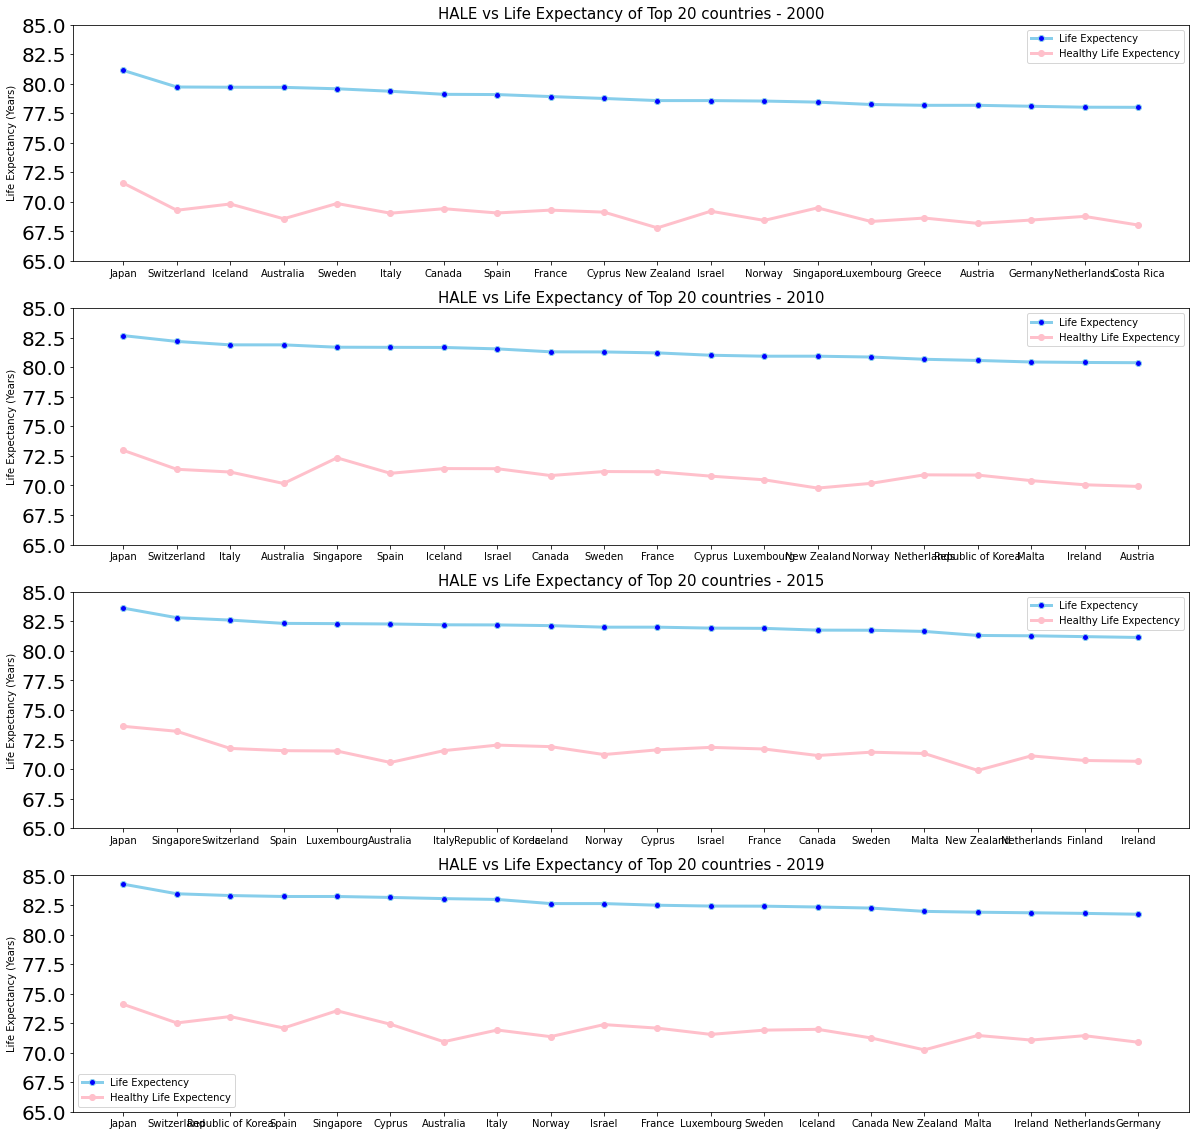

In [48]:
fig = plt.figure(figsize=(20,20))

plt1 = plt.subplot2grid((4,1),(0,0), rowspan=1, colspan=1)
plt1.plot( 'Country', 'Life_Expectency_In_Years', data=df_le_country_2000_top20, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Life Expectency")
plt1.plot( 'Country', 'Healthy_Life_Expectency_In_Years', data=df_le_country_2000_top20, marker='o', color='pink', linewidth=3 , label="Healthy Life Expectency")
plt.legend()
plt.ylim(65,85)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.ylabel("Life Expectancy (Years)")
plt.title("HALE vs Life Expectancy of Top 20 countries - 2000" , fontsize=15)

plt2 = plt.subplot2grid((4,1),(1,0), rowspan=1, colspan=1)
plt2.plot( 'Country', 'Life_Expectency_In_Years', data=df_le_country_2010_top20, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Life Expectency")
plt2.plot( 'Country', 'Healthy_Life_Expectency_In_Years', data=df_le_country_2010_top20, marker='o', color='pink', linewidth=3 , label="Healthy Life Expectency")
plt.legend()
plt.ylim(65,85)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.ylabel("Life Expectancy (Years)")
plt.title("HALE vs Life Expectancy of Top 20 countries - 2010" , fontsize=15)


plt3 = plt.subplot2grid((4,1),(2,0), rowspan=1, colspan=1)
plt3.plot( 'Country', 'Life_Expectency_In_Years', data=df_le_country_2015_top20, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Life Expectency")
plt3.plot( 'Country', 'Healthy_Life_Expectency_In_Years', data=df_le_country_2015_top20, marker='o', color='pink', linewidth=3 , label="Healthy Life Expectency")
plt.legend()
plt.ylim(65,85)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.ylabel("Life Expectancy (Years)")
plt.title("HALE vs Life Expectancy of Top 20 countries - 2015" , fontsize=15)

plt3 = plt.subplot2grid((4,1),(3,0), rowspan=1, colspan=1)
plt3.plot( 'Country', 'Life_Expectency_In_Years', data=df_le_country_2019_top20, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Life Expectency")
plt3.plot( 'Country', 'Healthy_Life_Expectency_In_Years', data=df_le_country_2019_top20, marker='o', color='pink', linewidth=3 , label="Healthy Life Expectency")
plt.legend()
plt.ylim(65,85)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.ylabel("Life Expectancy (Years)")
plt.title("HALE vs Life Expectancy of Top 20 countries - 2019" , fontsize=15)

**Observation** 

1) The gap between __Healthy Life Expectency__  and __Life Expectency__ of all the top 20 countries have remained consistently same though 2000 to 2019. It means that if the __Life Expectency__ has improved / diminished for these countries, even __Healthy Life Expectency__ has also improved/diminished

2) There is bigger gap between __Healthy Life Expectency__  and __Life Expectency__ for __Australia__ and __Newzealand__ . It means that these countries are not doing well in terms of Healthy life expectecy even though their Life expectency is higher compared to the other top 20 countries plotted in the graph.

3) Other counties such as __Singapore__  , __Isreal__ and __Republic of Korea__ are having better __Healthy Life Expectency__ compared to the countries which have higher __Life Expectency__ 

### Question 8:
- How is the __Healthy Life Expectency__ of the bottom 20 countries related to __Life Expectency__ 

Text(0.5, 1.0, 'HALE vs Life Expectancy of Bottom 20 countries - 2019')

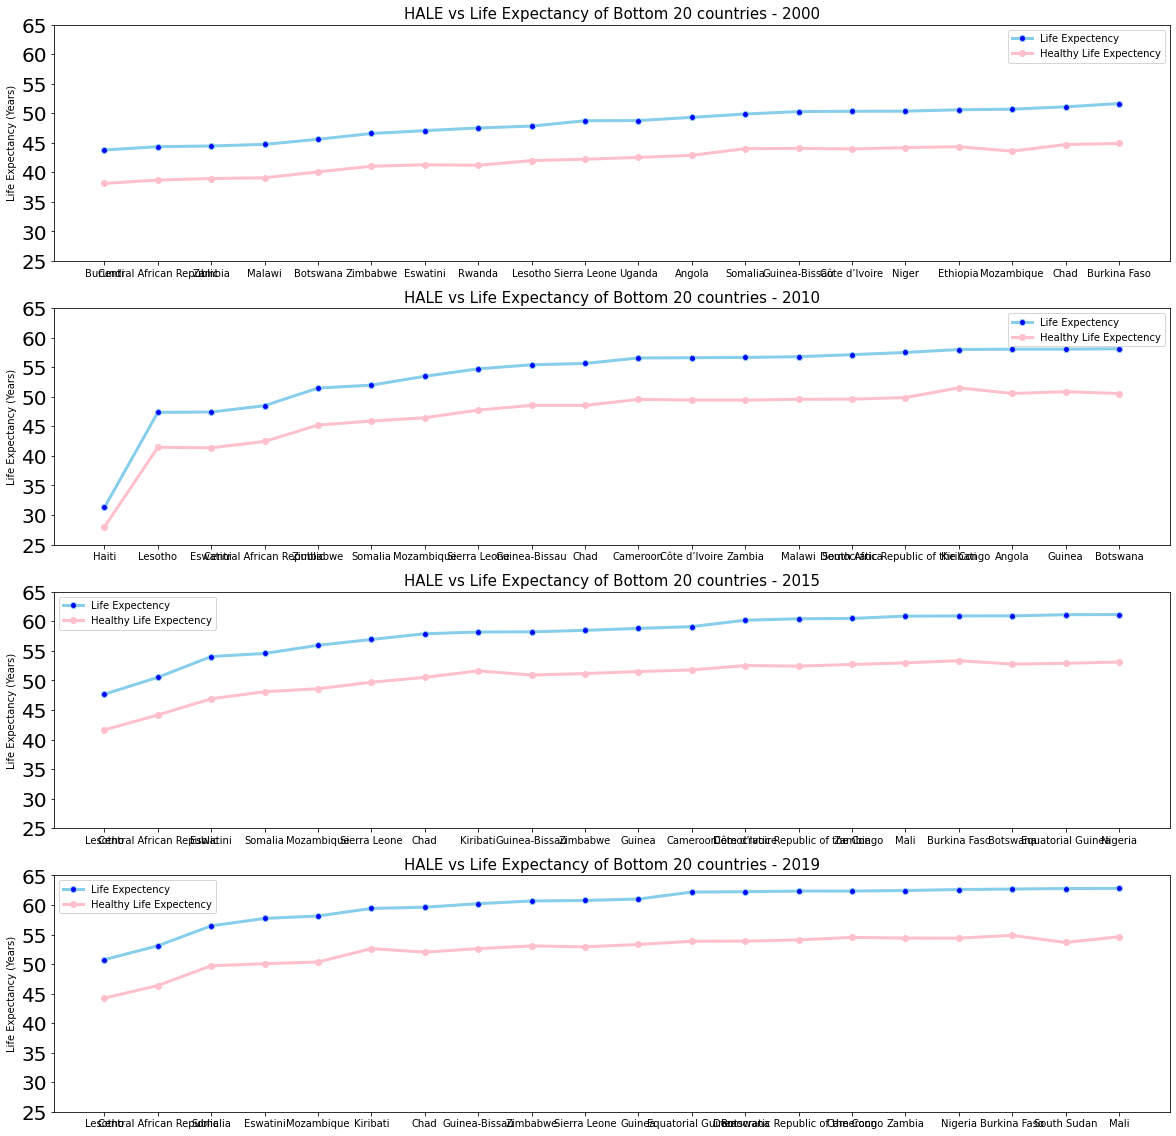

In [49]:
fig = plt.figure(figsize=(20,20))

plt1 = plt.subplot2grid((4,1),(0,0), rowspan=1, colspan=1)
plt1.plot( 'Country', 'Life_Expectency_In_Years', data=df_le_country_2000_bottom20, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Life Expectency")
plt1.plot( 'Country', 'Healthy_Life_Expectency_In_Years', data=df_le_country_2000_bottom20, marker='o', color='pink', linewidth=3 , label="Healthy Life Expectency")
plt.legend()
plt.ylim(25,65)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.ylabel("Life Expectancy (Years)")
plt.title("HALE vs Life Expectancy of Bottom 20 countries - 2000" , fontsize=15)

plt2 = plt.subplot2grid((4,1),(1,0), rowspan=1, colspan=1)
plt2.plot( 'Country', 'Life_Expectency_In_Years', data=df_le_country_2010_bottom20, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Life Expectency")
plt2.plot( 'Country', 'Healthy_Life_Expectency_In_Years', data=df_le_country_2010_bottom20, marker='o', color='pink', linewidth=3 , label="Healthy Life Expectency")
plt.legend()
plt.ylim(25,65)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.ylabel("Life Expectancy (Years)")
plt.title("HALE vs Life Expectancy of Bottom 20 countries - 2010" , fontsize=15)


plt3 = plt.subplot2grid((4,1),(2,0), rowspan=1, colspan=1)
plt3.plot( 'Country', 'Life_Expectency_In_Years', data=df_le_country_2015_bottom20, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Life Expectency")
plt3.plot( 'Country', 'Healthy_Life_Expectency_In_Years', data=df_le_country_2015_bottom20, marker='o', color='pink', linewidth=3 , label="Healthy Life Expectency")
plt.legend()
plt.ylim(25,65)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.ylabel("Life Expectancy (Years)")
plt.title("HALE vs Life Expectancy of Bottom 20 countries - 2015" , fontsize=15)

plt3 = plt.subplot2grid((4,1),(3,0), rowspan=1, colspan=1)
plt3.plot( 'Country', 'Life_Expectency_In_Years', data=df_le_country_2019_bottom20, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Life Expectency")
plt3.plot( 'Country', 'Healthy_Life_Expectency_In_Years', data=df_le_country_2019_bottom20, marker='o', color='pink', linewidth=3 , label="Healthy Life Expectency")
plt.legend()
plt.ylim(25,65)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.ylabel("Life Expectancy (Years)")
plt.title("HALE vs Life Expectancy of Bottom 20 countries - 2019" , fontsize=15)

**Observation** 

  The gap between __Healthy Life Expectency__  and __Life Expectency__ of all the bottom 20 countries have remained consistently same though 2000 to 2019. It means that if the __Life Expectency__ has improved / diminished for these countries, even __Healthy Life Expectency__ has also improved/diminished

### Question 9:
- How is India placed with regards to gender demograph when compared with SE Asia and World

Text(0.5, 1.0, 'Healthy Life Expectancy of India - 2000 to 2019')

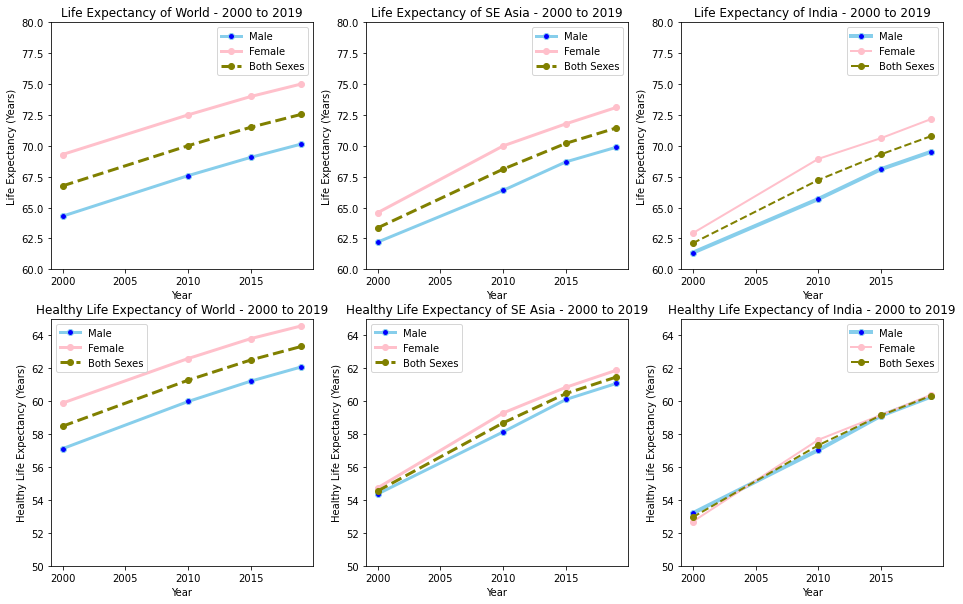

In [50]:
fig = plt.figure(figsize=(16,10))
filter_male = (df_le_hale_country['Demograph'] =='Male')
filter_female =(df_le_hale_country['Demograph'] =='Female')
filter_both =  (df_le_hale_country['Demograph'] =='Both sexes')
filter_male_India = (df_le_hale_India['Demograph'] =='Male')
filter_female_India =(df_le_hale_India['Demograph'] =='Female')
filter_both_India =  (df_le_hale_India['Demograph'] =='Both sexes')
filter_male_SE_Asia = (df_le_hale_SE_Asia['Demograph'] =='Male')
filter_female_SE_Asia =(df_le_hale_SE_Asia['Demograph'] =='Female')
filter_both_SE_Asia =  (df_le_hale_SE_Asia['Demograph'] =='Both sexes')

# Life expectency of World - 2000 to 2019
plt1 = plt.subplot2grid((2,3),(0,0), rowspan=1, colspan=1)
df_male_world = df_le_hale_country[filter_male].groupby(['Period'])['Life_Expectency_In_Years'].mean().to_frame()
df_male_world = df_male_world.reset_index()
df_female_world = df_le_hale_country[filter_female].groupby(['Period'])['Life_Expectency_In_Years'].mean()
df_female_world = df_female_world.reset_index()
df_both_world = df_le_hale_country[filter_both].groupby(['Period'])['Life_Expectency_In_Years'].mean()
df_both_world = df_both_world.reset_index()
# multiple line plot
plt1.plot( 'Period', 'Life_Expectency_In_Years', data=df_male_world, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Male")
plt1.plot( 'Period', 'Life_Expectency_In_Years', data=df_female_world, marker='o', color='pink', linewidth=3 , label="Female")
plt1.plot( 'Period', 'Life_Expectency_In_Years', data=df_both_world, marker='o', color='olive', linewidth=3, linestyle='dashed', label="Both Sexes")
plt.legend()
plt.ylim(60,80)
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.title("Life Expectancy of World - 2000 to 2019")


# Life expectency of SE Asia - 2000 to 2019
plt2 = plt.subplot2grid((2,3),(0,1), rowspan=1, colspan=1)
df_male_SE_Asia = df_le_hale_SE_Asia[filter_male_SE_Asia].groupby(['Period'])['Life_Expectency_In_Years'].mean()
df_male_SE_Asia = df_male_SE_Asia.reset_index()
df_female_SE_Asia = df_le_hale_SE_Asia[filter_female_SE_Asia].groupby(['Period'])['Life_Expectency_In_Years'].mean()
df_female_SE_Asia = df_female_SE_Asia.reset_index()
df_both_SE_Asia = df_le_hale_SE_Asia[filter_both_SE_Asia].groupby(['Period'])['Life_Expectency_In_Years'].mean()
df_both_SE_Asia = df_both_SE_Asia.reset_index()
# multiple line plot
plt2.plot( 'Period', 'Life_Expectency_In_Years', data=df_male_SE_Asia, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Male")
plt2.plot( 'Period', 'Life_Expectency_In_Years', data=df_female_SE_Asia, marker='o', color='pink', linewidth=3 , label="Female")
plt2.plot( 'Period', 'Life_Expectency_In_Years', data=df_both_SE_Asia, marker='o', color='olive', linewidth=3, linestyle='dashed', label="Both Sexes")
plt.legend()
plt.ylim(60,80)
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.title("Life Expectancy of SE Asia - 2000 to 2019")


# Life expectency of India - 2000 to 2019
plt3 = plt.subplot2grid((2,3),(0,2), rowspan=1, colspan=1)
df_male_India = df_le_hale_India[filter_male_India].groupby(['Period'])['Life_Expectency_In_Years'].mean()
df_male_India = df_male_India.reset_index()
df_female_India = df_le_hale_India[filter_female_India].groupby(['Period'])['Life_Expectency_In_Years'].mean()
df_female_India = df_female_India.reset_index()
df_both_India = df_le_hale_India[filter_both_India].groupby(['Period'])['Life_Expectency_In_Years'].mean()
df_both_India = df_both_India.reset_index()
# multiple line plot
plt3.plot( 'Period', 'Life_Expectency_In_Years', data=df_male_India, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4, label="Male")
plt3.plot( 'Period', 'Life_Expectency_In_Years', data=df_female_India, marker='o', color='pink', linewidth=2 , label="Female")
plt3.plot( 'Period', 'Life_Expectency_In_Years', data=df_both_India, marker='o', color='olive', linewidth=2, linestyle='dashed', label="Both Sexes")
plt.legend()
plt.ylim(60,80)
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.title("Life Expectancy of India - 2000 to 2019")


# Healthy Life expectency of World - 2000 to 2019
plt4 = plt.subplot2grid((2,3),(1,0), rowspan=1, colspan=1)
df_male_world = df_le_hale_country[filter_male].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean().to_frame()
df_male_world = df_male_world.reset_index()
df_female_world = df_le_hale_country[filter_female].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean()
df_female_world = df_female_world.reset_index()
df_both_world = df_le_hale_country[filter_both].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean()
df_both_world = df_both_world.reset_index()
# multiple line plot
plt4.plot( 'Period', 'Healthy_Life_Expectency_In_Years', data=df_male_world, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Male")
plt4.plot( 'Period', 'Healthy_Life_Expectency_In_Years', data=df_female_world, marker='o', color='pink', linewidth=3 , label="Female")
plt4.plot( 'Period', 'Healthy_Life_Expectency_In_Years', data=df_both_world, marker='o', color='olive', linewidth=3, linestyle='dashed', label="Both Sexes")
plt.legend()
plt.ylim(50,65)
plt.xlabel("Year")
plt.ylabel("Healthy Life Expectancy (Years)")
plt.title("Healthy Life Expectancy of World - 2000 to 2019")

# Healthy Life expectency of SE Asia - 2000 to 2019
plt5 = plt.subplot2grid((2,3),(1,1), rowspan=1, colspan=1)
df_male_SE_Asia = df_le_hale_SE_Asia[filter_male_SE_Asia].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean().to_frame()
df_male_SE_Asia = df_male_SE_Asia.reset_index()
df_female_SE_Asia = df_le_hale_SE_Asia[filter_female_SE_Asia].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean()
df_female_SE_Asia = df_female_SE_Asia.reset_index()
df_both_SE_Asia = df_le_hale_SE_Asia[filter_both_SE_Asia].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean()
df_both_SE_Asia = df_both_SE_Asia.reset_index()

# multiple line plot
plt5.plot( 'Period', 'Healthy_Life_Expectency_In_Years', data=df_male_SE_Asia, marker='o', markerfacecolor='blue', color='skyblue', linewidth=3, label="Male")
plt5.plot( 'Period', 'Healthy_Life_Expectency_In_Years', data=df_female_SE_Asia, marker='o', color='pink', linewidth=3 , label="Female")
plt5.plot( 'Period', 'Healthy_Life_Expectency_In_Years', data=df_both_SE_Asia, marker='o', color='olive', linewidth=3, linestyle='dashed', label="Both Sexes")
plt.legend()
plt.ylim(50,65)
plt.xlabel("Year")
plt.ylabel("Healthy Life Expectancy (Years)")
plt.title("Healthy Life Expectancy of SE Asia - 2000 to 2019")


# Healthy Life expectency of India - 2000 to 2019
plt6 = plt.subplot2grid((2,3),(1,2), rowspan=1, colspan=1)
df_male_India = df_le_hale_India[filter_male_India].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean().to_frame()
df_male_India = df_male_India.reset_index()
df_female_India = df_le_hale_India[filter_female_India].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean()
df_female_India = df_female_India.reset_index()
df_both_India = df_le_hale_India[filter_both_India].groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean()
df_both_India = df_both_India.reset_index()
# multiple line plot
plt6.plot( 'Period', 'Healthy_Life_Expectency_In_Years', data=df_male_India, marker='o', markerfacecolor='blue', color='skyblue', linewidth=4, label="Male")
plt6.plot( 'Period', 'Healthy_Life_Expectency_In_Years', data=df_female_India, marker='o', color='pink', linewidth=2 , label="Female")
plt6.plot( 'Period', 'Healthy_Life_Expectency_In_Years', data=df_both_India, marker='o', color='olive', linewidth=2, linestyle='dashed', label="Both Sexes")
plt.legend()
plt.ylim(50,65)
plt.xlabel("Year")
plt.ylabel("Healthy Life Expectancy (Years)")
plt.title("Healthy Life Expectancy of India - 2000 to 2019")






**Observation** 

1) __Both Males and Females__ in __India__ have lower average __Life Expectency and Healthy Life Expectency__ compared to all the __countries in the world and SE Asia region__

2) There is a consistent __increase in the Life Expectency and Healthy Life Expectency__ of both the gender with period.

3) Average of  __Life Expectency and Healthy Life Expectency__ of __Females is higher than the Males__ across the world
        
4) There was a slight deviation in __Healthy Life Expectency__ in India where __Males__ had higher __Healthy Life Expectency__    than __Females__ in 2000 
    
    Also in year 2019, __Healthy Life Expectency__  of Males and Females are almost same in India.
    
3) There is considerably less difference between  __Life Expectency__ of Females and Males compared to that of other countries in the world.  Same is true for  __Healthy Life Expectency__

### Question 10:
- How  __Healthy Life Expectency__ in India  changed with respect to  __Life Expectency__ over a period of time  when compared with SE Asia and World

Text(0.5, 1.0, 'Life Expectency vs HALE 2000-2019 - World')

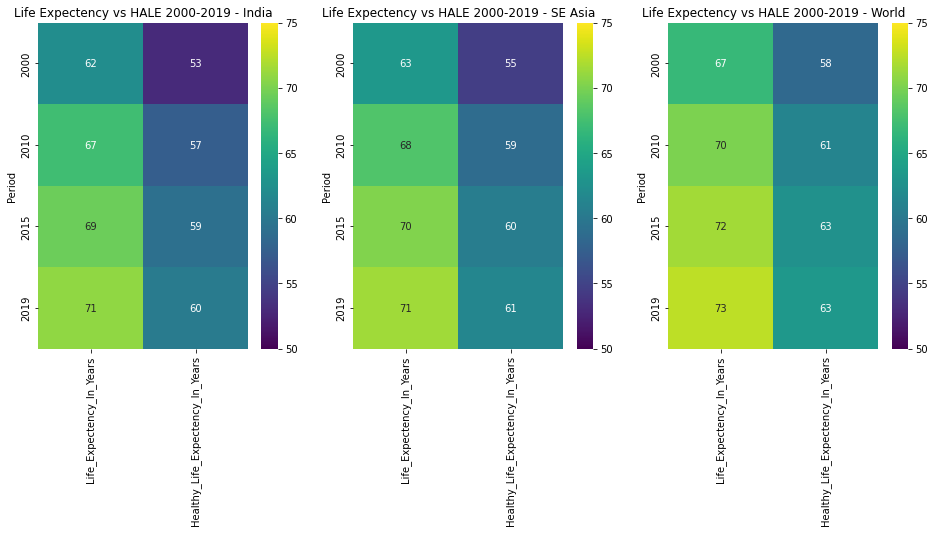

In [51]:
plt.figure(figsize=(16, 6))

df_le_relation =  pd.DataFrame(df_le_hale_India.groupby(['Period'])['Life_Expectency_In_Years'].mean())
df_hale_relation =  pd.DataFrame(df_le_hale_India.groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean())

plt1 = plt.subplot2grid((1,3),(0,0), rowspan=1, colspan=1)
frames = [df_le_relation, df_hale_relation]
df_le_hale_relation_india = pd.concat(frames, axis=1)
sns.heatmap(df_le_hale_relation_india, annot=True, cmap='viridis' ,vmin=50, vmax=75)
plt.title('Life Expectency vs HALE 2000-2019 - India')


plt2 = plt.subplot2grid((1,3),(0,1), rowspan=1, colspan=1)
df_le_relation_SE_Asia =  pd.DataFrame(df_le_hale_SE_Asia.groupby(['Period'])['Life_Expectency_In_Years'].mean())
df_hale_relation_SE_Asia =  pd.DataFrame(df_le_hale_SE_Asia.groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean())

frames = [df_le_relation_SE_Asia, df_hale_relation_SE_Asia]
df_le_hale_relation_SE_Asia = pd.concat(frames, axis=1)
sns.heatmap(df_le_hale_relation_SE_Asia, annot=True, cmap='viridis' ,vmin=50, vmax=75)
plt.title('Life Expectency vs HALE 2000-2019 - SE Asia')


plt2 = plt.subplot2grid((1,3),(0,2), rowspan=1, colspan=1)
df_le_relation =  pd.DataFrame(df_le_hale_country.groupby(['Period'])['Life_Expectency_In_Years'].mean())
df_hale_relation =  pd.DataFrame(df_le_hale_country.groupby(['Period'])['Healthy_Life_Expectency_In_Years'].mean())

frames = [df_le_relation, df_hale_relation]
df_le_hale_relation_world = pd.concat(frames, axis=1)
df_le_hale_relation_world
sns.heatmap(df_le_hale_relation_world, annot=True, cmap='viridis' ,  vmin=50, vmax=75)
plt.title('Life Expectency vs HALE 2000-2019 - World')


**Observation** 

1)  __India__ and other counries in __SE Asia__ region have similar trend.

2)  When compared with the average of other countries of the world , India and SE Asian contries needs improvement. 

### Placement of India on world map with respect to Life Expectency and HALE - 2019

In [52]:
def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

world_geo = load_data('https://raw.githubusercontent.com/gayathrig21/WorldHealthStats2020/main/world_countries.json',
                      'world_countries.json',
                       json.load)

for d in world_geo["features"]:
        d["name"] = d["properties"]["name"]

df_le_map_2019 =  dict(zip(df_le_country_2019['Country'].tolist(), df_le_country_2019['Life_Expectency_In_Years'].tolist()))
df_hale_map_2019 =  dict(zip(df_hale_country_2019['Country'].tolist(), df_hale_country_2019['Healthy_Life_Expectency_In_Years'].tolist()))

proper_name_mapping = {
    "South Korea":"Republic of Korea",
    "United Kingdom":"United Kingdom of Great Britain and Northern Ireland",
    "North Korea":"Democratic People's Republic of Korea",
    "Iran":"Iran (Islamic Republic of)",
    "Macedonia":"The former Yugoslav Republic of Macedonia",
    "Syria":"Syrian Arab Republic",
    "Laos":"Lao People's Democratic Republic",
    "Guinea Bissau":"Guinea-Bissau",
    "Russia":"Russian Federation",
    "Venezuela":"Venezuela (Bolivarian Republic of)",
    "Bolivia":"Bolivia (Plurinational State of)",
    "Republic of the Congo" : "Congo",
    "Ivory Coast":"Côte d’Ivoire",
    "Republic of Serbia" : "Serbia",
    "Vietnam" : "Viet Nam"}

for d in world_geo["features"]:
     if d["name"] not in df_le_map_2019:      
        if d["name"] in proper_name_mapping.keys():           
            df_le_map_2019[d["name"]] = df_le_map_2019[proper_name_mapping[d["name"]]]
        else:
            df_le_map_2019[d["name"]] = 0
            
for d in world_geo["features"]:
     if d["name"] not in df_hale_map_2019:      
        if d["name"] in proper_name_mapping.keys():           
            df_hale_map_2019[d["name"]] = df_hale_map_2019[proper_name_mapping[d["name"]]]
        else:
            df_hale_map_2019[d["name"]] = 0
            
list(df_le_map_2019.items())
list(df_hale_map_2019.items())



[('Japan', 74.09),
 ('Singapore', 73.55),
 ('Republic of Korea', 73.06),
 ('Switzerland', 72.52),
 ('Cyprus', 72.41),
 ('Israel', 72.38),
 ('Spain', 72.09),
 ('France', 72.08),
 ('Iceland', 71.98),
 ('Italy', 71.92),
 ('Sweden', 71.91),
 ('Luxembourg', 71.55),
 ('Malta', 71.46),
 ('Netherlands', 71.44),
 ('Norway', 71.36),
 ('Canada', 71.25),
 ('Ireland', 71.07),
 ('Denmark', 71.04),
 ('Finland', 71.0),
 ('Portugal', 70.96),
 ('Austria', 70.94),
 ('Australia', 70.93),
 ('Germany', 70.89),
 ('Greece', 70.87),
 ('Slovenia', 70.74),
 ('Belgium', 70.56),
 ('New Zealand', 70.24),
 ('United Kingdom of Great Britain and Northern Ireland', 70.13),
 ('Kuwait', 70.09),
 ('Chile', 70.05),
 ('Costa Rica', 69.97),
 ('Maldives', 69.95),
 ('Peru', 69.5),
 ('Estonia', 69.24),
 ('Albania', 69.08),
 ('Colombia', 68.96),
 ('Czechia', 68.79),
 ('Panama', 68.68),
 ('Poland', 68.66),
 ('Croatia', 68.62),
 ('Slovakia', 68.54),
 ('China', 68.53),
 ('Ecuador', 68.48),
 ('Turkey', 68.41),
 ('Thailand', 68.26),


In [53]:
colorscale = linear.GnBu_09.to_step(200).scale(0, 100)
colorscale.caption = 'Life Expectency in Years- 2019'
m = Map(center=[1.0, 1.0]);

layer = Choropleth(
                    geo_data=world_geo,
                    choro_data=df_le_map_2019,
                    colormap=colorscale,
                    style={'fillOpacity': 1.0, "color":"tomato"},
                    key_on="name",
                    hover_style={ 'fillOpacity': 0.7 }
                        )


m.add_layer(layer)
m.layout.height="700px"
display(colorscale.caption)
display(colorscale)
m

'Life Expectency in Years- 2019'

Map(center=[1.0, 1.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [54]:
colorscale = linear.GnBu_09.to_step(200).scale(0, 100)
colorscale.caption = 'Healthy Life Expectency in Years- 2019'
m = Map(zoom=2)

layer = Choropleth(
                    geo_data=world_geo,
                    choro_data=df_hale_map_2019,
                    colormap=colorscale,
                    style={'fillOpacity': 1.0, "color":"tomato"},
                    key_on="name",
                    hover_style={ 'fillOpacity': 0.7 }
                        )


m.add_layer(layer)
m.layout.height="700px"
display(colorscale.caption)
display(colorscale)

m

'Healthy Life Expectency in Years- 2019'

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

**India vs World**

- India's Life Expectency and Healthy Life Expectency has improved over a period of time. But Average life expectency and HALE of India has remained low compared to the other countries of the World and SE Asia Region
- India ranks 117 compared to 184 countries of the world in 2019 with Life Expectency of 70 years.
- India ranks 9th in Life Expectency when compared with the 11 countries in SE Asian region 
- India's rank with respect to Life Expectency and Healthy Life Expectency has improved but the trend for Healthy Life Expectency is not in line with Life Expectency from 2015 to 2019.
- Both Males and Females in India have lower average Life Expectency and Healthy Life Expectency compared to all the countries in the world and SE Asia region
 


**World Trend**

- All the top 20 countries have the Life Expectency over 80 Years.Japan has consitently been on top for 10 years from 2000 to 2019. Repulic of Korea has shown a tremendous improvement over the years from below 20th position in 2000 to 3rd position in 2019. Germany has made its way back to top 20 in 2019 after 2000. Luxembourg had not been very consistent as it made it to 5th position in 2015 from 15th in 2000 . In 2019, it slipped to 11th position

- The Life Expectency of bottom countires have also improved from an average of 50 Years to 60 Years from 2000 to 2019
- The gap between Healthy Life Expectency and Life Expectency of all the top 20 countries have remained consistently same though 2000 to 2019. It means that if the Life Expectency has improved / diminished for these countries, even Healthy Life Expectency has also improved/diminished

- There is bigger gap between Healthy Life Expectency and Life Expectency for Australia and Newzealand . It means that these countries are not doing well in terms of Healthy life expectecy even though their Life expectency is higher compared to the other top 20 countries. Other counties such as Singapore , Isreal and Republic of Korea are having better Healthy Life Expectency compared to the countries which have higher Life Expectency




<a name = Section92></a>
### **9.2 Actionable Insights**

- Healthy Life Expectency is the major factor to be considered which in turn could increase the Life Expectency of a country or region.

- There could be numerous factors affecting the Life Expectency and Healthy Life Expectency of a country ranging from geography, cultural practises, healthcare, population, standard of living. 

- India should revisit all the factors and compare it with the coutries which have made a tremendous improvement and put forth such practises to improve the Life Expectency.